# Cross-Lingual Bias and Multilingual Fidelity in Large Language Models: A Comparative Analysis

## Abstract

This thesis aims to investigate the presence of cross-lingual biases in Large Language Models (LLMs) and their fidelity when dealing with factual information across multiple languages. Utilizing established factual data from Wikidata, we explore how various LLMs respond to prompts in different languages, highlighting deviations and disparities in their outputs. This study seeks to contribute to the understanding of inherent biases in LLMs, thereby ensuring their development as inclusive, equitable tools for global knowledge exchange.

## Introduction

In the era of pivotal language technologies, biases within Large Language Models (LLMs) represent a critical frontier in artificial intelligence. This thesis delves into cross-lingual biases present in LLMs, conducting a comprehensive analysis across multiple languages and models using Wikidata as a source of established factual data. Our research reveals deviations and disparities in LLM responses to general knowledge and factual queries, aiming to contribute to the ethical use and development of AI technologies in a multilingual world.

## Research Questions

The thesis explores the following main question and sub-questions:
- Main question: "To what extent can LLMs accurately answer factual data in multiple languages?"
- Sub-questions:
  - "In which areas of knowledge do LLMs exhibit the greatest inaccuracies, and how do these discrepancies vary across different categories of factual information?"
  - "Is there a discernible variance in the performance of different LLMs when tasked with interpreting and answering factual prompts across various languages?"
  - "Is there a relation between the language prompted in a LLM and the geographical origin of the prompted item?"

## Methodology

The research methodology encompasses model and language selection, data collection from Wikidata, and a structured approach to question generation and prompt design. Our analysis in this stage will focus on the exploration of the data extracted/querried from wikidata. It will involve extracting factual data about people, and events that originate from one of the 5 langauges/lcoations (Germany,France,UK,Japan,Turkey). The next steps will include results.

### DATA COLLECTION

A comprehensive and diverse dataset will be compiled from Wikidata, covering a broad range of factual information across the selected domains. Currently this sheet will only provide data on People, and Events. Whereas the whole thesis will also include data which include Physical locations and Art. This current dataset conatining only people and events will form the basis for evaluating the accuracy of LLM responses in multiple languages.


## Expected Contributions

This thesis is expected to provide essential insights into the cross-lingual biases and multilingual fidelity of LLMs, contributing to the broader discourse on AI ethics and the development of more equitable language technologies. The findings will not only inform future advancements in the field but also ensure that LLMs serve as inclusive, equitable tools for global knowledge exchange.

## Risk Assessment

We acknowledge potential challenges in data collection, the possibility of random or inconsistent responses from LLMs, and the rapid evolution of technology that could impact our findings. These risks will be mitigated through rigorous data validation, multiple prompt testing, and the use of specified model versions.

---



## PEOPLE
We will now explore the datasets obtained form querrying people of these 5 nationailities and check how many of them have all attributes for other langauges.

### You do not have to run the querries, the required csv data is already in the respective fiels People and Events in the zip fodler

##  EXTRACTING JAPANESE PEOPLE

In [1]:
#this querry is used to gather people with Japanese nationality
from SPARQLWrapper import SPARQLWrapper, JSON

# Initialize the SPARQL wrapper with the Wikidata endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define your SPARQL query
sparql_query = """
SELECT ?item 
       (SAMPLE(?englishLabel) AS ?itemNameEN)
       (SAMPLE(?frenchLabel) AS ?itemNameFR)
       (SAMPLE(?germanLabel) AS ?itemNameDE)
       (SAMPLE(?turkishLabel) AS ?itemNameTR)
       (SAMPLE(?japaneseLabel) AS ?itemNameJA)
       (SAMPLE(?occLabel) AS ?singleOccupationLabelJA)
       (SAMPLE(?occLabelEN) AS ?singleOccupationLabelEN)
       (SAMPLE(?occLabelFR) AS ?singleOccupationLabelFR)
       (SAMPLE(?occLabelDE) AS ?singleOccupationLabelDE)
       (SAMPLE(?occLabelTR) AS ?singleOccupationLabelTR)
       (SAMPLE(?natLabel) AS ?singleNationalityLabelJA)
       (SAMPLE(?natLabelEN) AS ?singleNationalityLabelEN)
       (SAMPLE(?natLabelFR) AS ?singleNationalityLabelFR)
       (SAMPLE(?natLabelDE) AS ?singleNationalityLabelDE)
       (SAMPLE(?natLabelTR) AS ?singleNationalityLabelTR)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "ja". }
  ?item p:P31 ?statement0.
  ?statement0 (ps:P31/(wdt:P279*)) wd:Q5.
  ?item p:P27 ?statement1.
  ?statement1 (ps:P27/(wdt:P279*)) wd:Q17.
  ?item p:P8687 ?statement2.
  ?statement2 (psv:P8687/wikibase:quantityAmount) ?numericQuantity.
  FILTER(?numericQuantity > "100000"^^xsd:decimal)

  OPTIONAL {
    ?item wdt:P106 ?occupation.
    ?occupation rdfs:label ?occLabel FILTER(LANG(?occLabel) = "ja").
    ?occupation rdfs:label ?occLabelEN FILTER(LANG(?occLabelEN) = "en").
    ?occupation rdfs:label ?occLabelFR FILTER(LANG(?occLabelFR) = "fr").
    ?occupation rdfs:label ?occLabelDE FILTER(LANG(?occLabelDE) = "de").
    ?occupation rdfs:label ?occLabelTR FILTER(LANG(?occLabelTR) = "tr").
  }
  OPTIONAL {
    ?item wdt:P27 ?nationality.
    ?nationality rdfs:label ?natLabel FILTER(LANG(?natLabel) = "ja").
    ?nationality rdfs:label ?natLabelEN FILTER(LANG(?natLabelEN) = "en").
    ?nationality rdfs:label ?natLabelFR FILTER(LANG(?natLabelFR) = "fr").
    ?nationality rdfs:label ?natLabelDE FILTER(LANG(?natLabelDE) = "de").
    ?nationality rdfs:label ?natLabelTR FILTER(LANG(?natLabelTR) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?englishLabel FILTER(LANG(?englishLabel) = "en").
  }
  OPTIONAL {
    ?item rdfs:label ?frenchLabel FILTER(LANG(?frenchLabel) = "fr").
  }
  OPTIONAL {
    ?item rdfs:label ?germanLabel FILTER(LANG(?germanLabel) = "de").
  }
  OPTIONAL {
    ?item rdfs:label ?turkishLabel FILTER(LANG(?turkishLabel) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?japaneseLabel FILTER(LANG(?japaneseLabel) = "ja").
  }
}
GROUP BY ?item
LIMIT 1000
"""

# Set the query and specify the return format as JSON
#sparql.setQuery(sparql_query)
#sparql.setReturnFormat(JSON)

# Execute the query and convert the results to a JSON object
#results = sparql.query().convert()

# Iterate through the results and print them out optional will take some time
#for result in results["results"]["bindings"]:
    #print(result)


## EXTRACTING FRENCH PEOPLE

In [2]:
#this querry is used to gather people with French nationality
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define the updated SPARQL query targeting entities related to France
sparql_query = """
SELECT ?item 
       (SAMPLE(?englishLabel) AS ?itemNameEN)
       (SAMPLE(?frenchLabel) AS ?itemNameFR)
       (SAMPLE(?germanLabel) AS ?itemNameDE)
       (SAMPLE(?turkishLabel) AS ?itemNameTR)
       (SAMPLE(?japaneseLabel) AS ?itemNameJA)
       (SAMPLE(?occLabel) AS ?singleOccupationLabelJA)
       (SAMPLE(?occLabelEN) AS ?singleOccupationLabelEN)
       (SAMPLE(?occLabelFR) AS ?singleOccupationLabelFR)
       (SAMPLE(?occLabelDE) AS ?singleOccupationLabelDE)
       (SAMPLE(?occLabelTR) AS ?singleOccupationLabelTR)
       (SAMPLE(?natLabel) AS ?singleNationalityLabelJA)
       (SAMPLE(?natLabelEN) AS ?singleNationalityLabelEN)
       (SAMPLE(?natLabelFR) AS ?singleNationalityLabelFR)
       (SAMPLE(?natLabelDE) AS ?singleNationalityLabelDE)
       (SAMPLE(?natLabelTR) AS ?singleNationalityLabelTR)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "ja". }
  ?item p:P31 ?statement0.
  ?statement0 (ps:P31/(wdt:P279*)) wd:Q5.
  ?item p:P27 ?statement1.
  ?statement1 (ps:P27/(wdt:P279*)) wd:Q142.
  ?item p:P8687 ?statement2.
  ?statement2 (psv:P8687/wikibase:quantityAmount) ?numericQuantity.
  FILTER(?numericQuantity > "100000"^^xsd:decimal)
  
  OPTIONAL {
    ?item wdt:P106 ?occupation.
    ?occupation rdfs:label ?occLabel FILTER(LANG(?occLabel) = "ja").
    ?occupation rdfs:label ?occLabelEN FILTER(LANG(?occLabelEN) = "en").
    ?occupation rdfs:label ?occLabelFR FILTER(LANG(?occLabelFR) = "fr").
    ?occupation rdfs:label ?occLabelDE FILTER(LANG(?occLabelDE) = "de").
    ?occupation rdfs:label ?occLabelTR FILTER(LANG(?occLabelTR) = "tr").
  }
  OPTIONAL {
    ?item wdt:P27 ?nationality.
    ?nationality rdfs:label ?natLabel FILTER(LANG(?natLabel) = "ja").
    ?nationality rdfs:label ?natLabelEN FILTER(LANG(?natLabelEN) = "en").
    ?nationality rdfs:label ?natLabelFR FILTER(LANG(?natLabelFR) = "fr").
    ?nationality rdfs:label ?natLabelDE FILTER(LANG(?natLabelDE) = "de").
    ?nationality rdfs:label ?natLabelTR FILTER(LANG(?natLabelTR) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?englishLabel FILTER(LANG(?englishLabel) = "en").
  }
  OPTIONAL {
    ?item rdfs:label ?frenchLabel FILTER(LANG(?frenchLabel) = "fr").
  }
  OPTIONAL {
    ?item rdfs:label ?germanLabel FILTER(LANG(?germanLabel) = "de").
  }
  OPTIONAL {
    ?item rdfs:label ?turkishLabel FILTER(LANG(?turkishLabel) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?japaneseLabel FILTER(LANG(?japaneseLabel) = "ja").
  }
}
GROUP BY ?item
LIMIT 1000
"""

# Set the query and specify the return format as JSON
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

# Execute the query and convert the results to a JSON object
results = sparql.query().convert()

# Iterate through the results and print them out
#for result in results["results"]["bindings"]:
#    print(result)


## EXTRACTING TURKISH PEOPLE

In [3]:

# Initialize the SPARQL wrapper with the Wikidata endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define the SPARQL query with the modifications for Turkey and adjusted numeric quantity filter
sparql_query = """
SELECT ?item 
       (SAMPLE(?englishLabel) AS ?itemNameEN)
       (SAMPLE(?frenchLabel) AS ?itemNameFR)
       (SAMPLE(?germanLabel) AS ?itemNameDE)
       (SAMPLE(?turkishLabel) AS ?itemNameTR)
       (SAMPLE(?japaneseLabel) AS ?itemNameJA)
       (SAMPLE(?occLabel) AS ?singleOccupationLabelJA)
       (SAMPLE(?occLabelEN) AS ?singleOccupationLabelEN)
       (SAMPLE(?occLabelFR) AS ?singleOccupationLabelFR)
       (SAMPLE(?occLabelDE) AS ?singleOccupationLabelDE)
       (SAMPLE(?occLabelTR) AS ?singleOccupationLabelTR)
       (SAMPLE(?natLabel) AS ?singleNationalityLabelJA)
       (SAMPLE(?natLabelEN) AS ?singleNationalityLabelEN)
       (SAMPLE(?natLabelFR) AS ?singleNationalityLabelFR)
       (SAMPLE(?natLabelDE) AS ?singleNationalityLabelDE)
       (SAMPLE(?natLabelTR) AS ?singleNationalityLabelTR)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "ja". }
  ?item p:P31 ?statement0.
  ?statement0 (ps:P31/(wdt:P279*)) wd:Q5.
  ?item p:P27 ?statement1.
  ?statement1 (ps:P27/(wdt:P279*)) wd:Q43.
  ?item p:P8687 ?statement2.
  ?statement2 (psv:P8687/wikibase:quantityAmount) ?numericQuantity.
  FILTER(?numericQuantity > "50000"^^xsd:decimal)

  OPTIONAL {
    ?item wdt:P106 ?occupation.
    ?occupation rdfs:label ?occLabel FILTER(LANG(?occLabel) = "ja").
    ?occupation rdfs:label ?occLabelEN FILTER(LANG(?occLabelEN) = "en").
    ?occupation rdfs:label ?occLabelFR FILTER(LANG(?occLabelFR) = "fr").
    ?occupation rdfs:label ?occLabelDE FILTER(LANG(?occLabelDE) = "de").
    ?occupation rdfs:label ?occLabelTR FILTER(LANG(?occLabelTR) = "tr").
  }
  OPTIONAL {
    ?item wdt:P27 ?nationality.
    ?nationality rdfs:label ?natLabel FILTER(LANG(?natLabel) = "ja").
    ?nationality rdfs:label ?natLabelEN FILTER(LANG(?natLabelEN) = "en").
    ?nationality rdfs:label ?natLabelFR FILTER(LANG(?natLabelFR) = "fr").
    ?nationality rdfs:label ?natLabelDE FILTER(LANG(?natLabelDE) = "de").
    ?nationality rdfs:label ?natLabelTR FILTER(LANG(?natLabelTR) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?englishLabel FILTER(LANG(?englishLabel) = "en").
  }
  OPTIONAL {
    ?item rdfs:label ?frenchLabel FILTER(LANG(?frenchLabel) = "fr").
  }
  OPTIONAL {
    ?item rdfs:label ?germanLabel FILTER(LANG(?germanLabel) = "de").
  }
  OPTIONAL {
    ?item rdfs:label ?turkishLabel FILTER(LANG(?turkishLabel) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?japaneseLabel FILTER(LANG(?japaneseLabel) = "ja").
  }
}
GROUP BY ?item
LIMIT 1000
"""

# Set the query and specify the return format as JSON
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

# Execute the query and convert the results to a JSON object
results = sparql.query().convert()

# Iterate through the results and print them out
#for result in results["results"]["bindings"]:
#    print(result)


## EXTRACTING ENGLISH PEOPLE

In [4]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Initialize SPARQL wrapper with Wikidata endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define the SPARQL query
sparql_query = """
SELECT ?item 
       (SAMPLE(?englishLabel) AS ?itemNameEN)
       (SAMPLE(?frenchLabel) AS ?itemNameFR)
       (SAMPLE(?germanLabel) AS ?itemNameDE)
       (SAMPLE(?turkishLabel) AS ?itemNameTR)
       (SAMPLE(?japaneseLabel) AS ?itemNameJA)
       (SAMPLE(?occLabel) AS ?singleOccupationLabelJA)
       (SAMPLE(?occLabelEN) AS ?singleOccupationLabelEN)
       (SAMPLE(?occLabelFR) AS ?singleOccupationLabelFR)
       (SAMPLE(?occLabelDE) AS ?singleOccupationLabelDE)
       (SAMPLE(?occLabelTR) AS ?singleOccupationLabelTR)
       (SAMPLE(?natLabel) AS ?singleNationalityLabelJA)
       (SAMPLE(?natLabelEN) AS ?singleNationalityLabelEN)
       (SAMPLE(?natLabelFR) AS ?singleNationalityLabelFR)
       (SAMPLE(?natLabelDE) AS ?singleNationalityLabelDE)
       (SAMPLE(?natLabelTR) AS ?singleNationalityLabelTR)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "ja". }
  ?item p:P31 ?statement0.
  ?statement0 (ps:P31/(wdt:P279*)) wd:Q5.
  ?item p:P27 ?statement1.
  ?statement1 (ps:P27/(wdt:P279*)) wd:Q183.
  ?item p:P8687 ?statement2.
  ?statement2 (psv:P8687/wikibase:quantityAmount) ?numericQuantity.
  FILTER(?numericQuantity > "25000"^^xsd:decimal)

  OPTIONAL {
    ?item wdt:P106 ?occupation.
    ?occupation rdfs:label ?occLabel FILTER(LANG(?occLabel) = "ja").
    ?occupation rdfs:label ?occLabelEN FILTER(LANG(?occLabelEN) = "en").
    ?occupation rdfs:label ?occLabelFR FILTER(LANG(?occLabelFR) = "fr").
    ?occupation rdfs:label ?occLabelDE FILTER(LANG(?occLabelDE) = "de").
    ?occupation rdfs:label ?occLabelTR FILTER(LANG(?occLabelTR) = "tr").
  }
  OPTIONAL {
    ?item wdt:P27 ?nationality.
    ?nationality rdfs:label ?natLabel FILTER(LANG(?natLabel) = "ja").
    ?nationality rdfs:label ?natLabelEN FILTER(LANG(?natLabelEN) = "en").
    ?nationality rdfs:label ?natLabelFR FILTER(LANG(?natLabelFR) = "fr").
    ?nationality rdfs:label ?natLabelDE FILTER(LANG(?natLabelDE) = "de").
    ?nationality rdfs:label ?natLabelTR FILTER(LANG(?natLabelTR) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?englishLabel FILTER(LANG(?englishLabel) = "en").
  }
  OPTIONAL {
    ?item rdfs:label ?frenchLabel FILTER(LANG(?frenchLabel) = "fr").
  }
  OPTIONAL {
    ?item rdfs:label ?germanLabel FILTER(LANG(?germanLabel) = "de").
  }
  OPTIONAL {
    ?item rdfs:label ?turkishLabel FILTER(LANG(?turkishLabel) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?japaneseLabel FILTER(LANG(?japaneseLabel) = "ja").
  }
}
GROUP BY ?item
LIMIT 1000
"""

# Set query and format
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

# Execute query
results = sparql.query().convert()

# Process and print results
#for result in results["results"]["bindings"]:
#    print(result)


## EXTRACTING GERMAN PEOPLE

In [5]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Initialize SPARQL wrapper with Wikidata endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define the SPARQL query with modifications for targeting Germany (wd:Q183)
sparql_query = """
SELECT ?item 
       (SAMPLE(?englishLabel) AS ?itemNameEN)
       (SAMPLE(?frenchLabel) AS ?itemNameFR)
       (SAMPLE(?germanLabel) AS ?itemNameDE)
       (SAMPLE(?turkishLabel) AS ?itemNameTR)
       (SAMPLE(?japaneseLabel) AS ?itemNameJA)
       (SAMPLE(?occLabel) AS ?singleOccupationLabelJA)
       (SAMPLE(?occLabelEN) AS ?singleOccupationLabelEN)
       (SAMPLE(?occLabelFR) AS ?singleOccupationLabelFR)
       (SAMPLE(?occLabelDE) AS ?singleOccupationLabelDE)
       (SAMPLE(?occLabelTR) AS ?singleOccupationLabelTR)
       (SAMPLE(?natLabel) AS ?singleNationalityLabelJA)
       (SAMPLE(?natLabelEN) AS ?singleNationalityLabelEN)
       (SAMPLE(?natLabelFR) AS ?singleNationalityLabelFR)
       (SAMPLE(?natLabelDE) AS ?singleNationalityLabelDE)
       (SAMPLE(?natLabelTR) AS ?singleNationalityLabelTR)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "ja". }
  ?item p:P31 ?statement0.
  ?statement0 (ps:P31/(wdt:P279*)) wd:Q5.
  ?item p:P27 ?statement1.
  ?statement1 (ps:P27/(wdt:P279*)) wd:Q183.
  ?item p:P8687 ?statement2.
  ?statement2 (psv:P8687/wikibase:quantityAmount) ?numericQuantity.
  FILTER(?numericQuantity > "25000"^^xsd:decimal)

  OPTIONAL {
    ?item wdt:P106 ?occupation.
    ?occupation rdfs:label ?occLabel FILTER(LANG(?occLabel) = "ja").
    ?occupation rdfs:label ?occLabelEN FILTER(LANG(?occLabelEN) = "en").
    ?occupation rdfs:label ?occLabelFR FILTER(LANG(?occLabelFR) = "fr").
    ?occupation rdfs:label ?occLabelDE FILTER(LANG(?occLabelDE) = "de").
    ?occupation rdfs:label ?occLabelTR FILTER(LANG(?occLabelTR) = "tr").
  }
  OPTIONAL {
    ?item wdt:P27 ?nationality.
    ?nationality rdfs:label ?natLabel FILTER(LANG(?natLabel) = "ja").
    ?nationality rdfs:label ?natLabelEN FILTER(LANG(?natLabelEN) = "en").
    ?nationality rdfs:label ?natLabelFR FILTER(LANG(?natLabelFR) = "fr").
    ?nationality rdfs:label ?natLabelDE FILTER(LANG(?natLabelDE) = "de").
    ?nationality rdfs:label ?natLabelTR FILTER(LANG(?natLabelTR) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?englishLabel FILTER(LANG(?englishLabel) = "en").
  }
  OPTIONAL {
    ?item rdfs:label ?frenchLabel FILTER(LANG(?frenchLabel) = "fr").
  }
  OPTIONAL {
    ?item rdfs:label ?germanLabel FILTER(LANG(?germanLabel) = "de").
  }
  OPTIONAL {
    ?item rdfs:label ?turkishLabel FILTER(LANG(?turkishLabel) = "tr").
  }
  OPTIONAL {
    ?item rdfs:label ?japaneseLabel FILTER(LANG(?japaneseLabel) = "ja").
  }
}
GROUP BY ?item
LIMIT 1000
"""

# Set the query and specify the return format as JSON
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

# Execute the query and convert the results to a JSON object
#results = sparql.query().convert()

# Process and print results
#for result in results["results"]["bindings"]:
#    print(result)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')
turkish_people = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\People\TR People.csv")
french_people = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\People\FR People.csv")
german_people = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\People\DE People.csv")
japan_people = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\People\JA People.csv")
uk_people = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\People\UK People.csv")


In [7]:
uk_people

,item,itemNameEN,itemNameFR,itemNameDE,itemNameTR,itemNameJA,singleOccupationLabelJA,singleOccupationLabelEN,singleOccupationLabelFR,singleOccupationLabelDE,singleOccupationLabelTR,singleNationalityLabelJA,singleNationalityLabelEN,singleNationalityLabelFR,singleNationalityLabelDE,singleNationalityLabelTR,birthYear
0,http://www.wikidata.org/entity/Q76139,Gerry Adams,Gerry Adams,Gerry Adams,Gerry Adams,ジェリー・アダムズ,政治家,politician,personnalité politique,Politiker,siyasetçi,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1948.0
1,http://www.wikidata.org/entity/Q95885,Andrew Flintoff,Andrew Flintoff,Andrew Flintoff,NaN,フレディ・フリントフ,クリケット選手,cricketer,joueur de cricket,Cricketspieler,kriketçi,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1977.0
2,http://www.wikidata.org/entity/Q105466,Bonnie Wright,Bonnie Wright,Bonnie Wright,Bonnie Wright,ボニー・ライト,映画俳優,film actor,acteur ou actrice de cinéma,Filmschauspieler,sinema oyuncusu,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1991.0
3,http://www.wikidata.org/entity/Q109098,Katie Leung,Katie Leung,Katie Leung,Katie Leung,ケイティ・リューング,映画俳優,film actor,acteur ou actrice de cinéma,Filmschauspieler,sinema oyuncusu,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1987.0
4,http://www.wikidata.org/entity/Q116516,Ricky Hatton,Ricky Hatton,Ricky Hatton,NaN,リッキー・ハットン,ボクサー,boxer,boxeur,Boxer,boksör,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,http://www.wikidata.org/entity/Q21995544,Christopher Maloney,Chris Maloney,Chris Maloney,NaN,NaN,歌手,singer,chanteur ou chanteuse,Sänger,şarkıcı,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1977.0
996,http://www.wikidata.org/entity/Q22007193,Lando Norris,Lando Norris,Lando Norris,Lando Norris,ランド・ノリス,NaN,NaN,NaN,NaN,NaN,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1999.0
997,http://www.wikidata.org/entity/Q22279140,Megan McKenna,Megan McKenna,Megan McKenna,Megan McKenna,NaN,レコーディング・アーティスト,recording artist,artiste d'enregistrement,Aufnahmekünstler,stüdyo sanatçısı,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1992.0
998,http://www.wikidata.org/entity/Q22951255,Marcus Rashford,Marcus Rashford,Marcus Rashford,Marcus Rashford,マーカス・ラッシュフォード,慈善家,philanthropist,philanthrope,Philanthrop,hayırsever,イギリス,United Kingdom,Royaume-Uni,Vereinigtes Königreich,Birleşik Krallık,1997.0


#### Here we tweak with all extracted people and create new dataframes to explore the data and see patterns

In [8]:
most_common_french = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_english = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_turkish = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_japanese = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_german = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
# Iterate over each column in the DataFrame
for column in turkish_people.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = turkish_people[column].value_counts().nlargest(5).index.tolist()
    counts = turkish_people[column].value_counts().nlargest(5).tolist()
    column_type = turkish_people[column].dtype
    unique_values = len(set(turkish_people[column]))

    # Append the results to the DataFrame
    most_common_turkish.loc[len(most_common_turkish)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}   

for column in french_people.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = french_people[column].value_counts().nlargest(5).index.tolist()
    counts = french_people[column].value_counts().nlargest(5).tolist()
    column_type = french_people[column].dtype
    unique_values = len(set(french_people[column]))

    # Append the results to the DataFrame
    most_common_french.loc[len(most_common_french)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}

for column in german_people.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = german_people[column].value_counts().nlargest(5).index.tolist()
    counts = german_people[column].value_counts().nlargest(5).tolist()
    column_type = german_people[column].dtype
    unique_values = len(set(german_people[column]))

    # Append the results to the DataFrame
    most_common_german.loc[len(most_common_german)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
for column in japan_people.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = japan_people[column].value_counts().nlargest(5).index.tolist()
    counts = japan_people[column].value_counts().nlargest(5).tolist()
    column_type = japan_people[column].dtype
    unique_values = len(set(japan_people[column]))

    # Append the results to the DataFrame
    most_common_japanese.loc[len(most_common_japanese)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
    
for column in uk_people.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = uk_people[column].value_counts().nlargest(5).index.tolist()
    counts = uk_people[column].value_counts().nlargest(5).tolist()
    column_type = uk_people[column].dtype
    unique_values = len(set(uk_people[column]))

    # Append the results to the DataFrame
    most_common_english.loc[len(most_common_english)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
# Print the resulting DataFrame
#display(most_common_french)


##  French PEOPLE STATISTICS
We will now explore how many mappings do we have for the extracted data on French people

In [9]:
display(most_common_french)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q193625, http:...","[1, 1, 1, 1, 1]",1000
1,itemNameEN,object,"[Wesley Fofana, Martin Fourcade, Marcel Desail...","[2, 2, 1, 1, 1]",998
2,itemNameFR,object,"[Wesley Fofana, Martin Fourcade, Marcel Desail...","[2, 2, 1, 1, 1]",998
3,itemNameDE,object,"[Wesley Fofana, Marcel Desailly, Gilles-Willia...","[2, 1, 1, 1, 1]",930
4,itemNameTR,object,"[Wesley Fofana, Marcel Desailly, Andy Delort, ...","[2, 1, 1, 1, 1]",663
5,itemNameJA,object,"[ウェスレイ・フォファナ, マルセル・デサイー, マチュー・シェディッド, ヴラジーミル・ポ...","[2, 1, 1, 1, 1]",532
6,singleOccupationLabelJA,object,"[サッカー選手, ラッパー, YouTuber, ジャーナリスト, 政治家]","[97, 65, 61, 58, 48]",131
7,singleOccupationLabelEN,object,"[association football player, rapper, YouTuber...","[97, 65, 61, 58, 44]",132
8,singleOccupationLabelFR,object,"[footballeur, rappeur ou rappeuse, YouTubeur o...","[97, 65, 61, 58, 44]",129
9,singleOccupationLabelDE,object,"[Fußballspieler, Rapper, YouTuber, Journalist,...","[97, 65, 61, 58, 44]",132


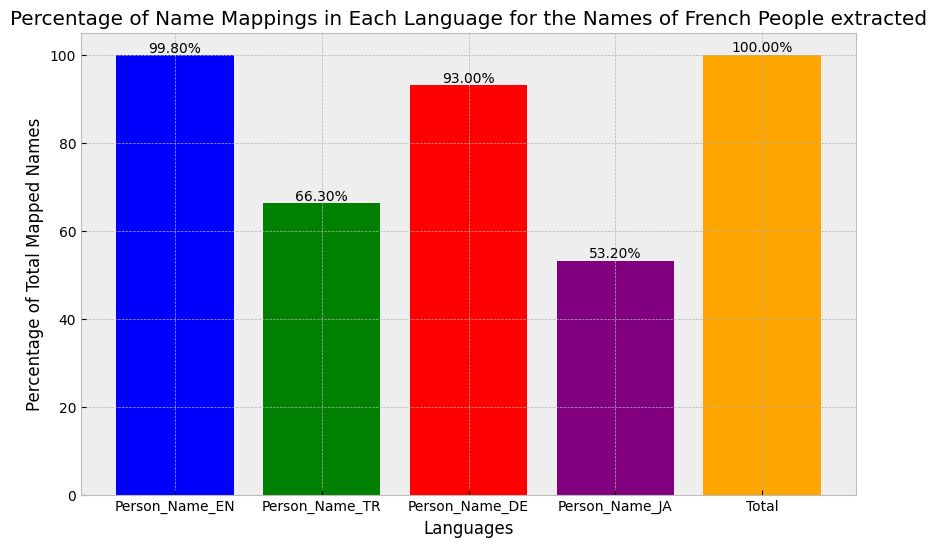

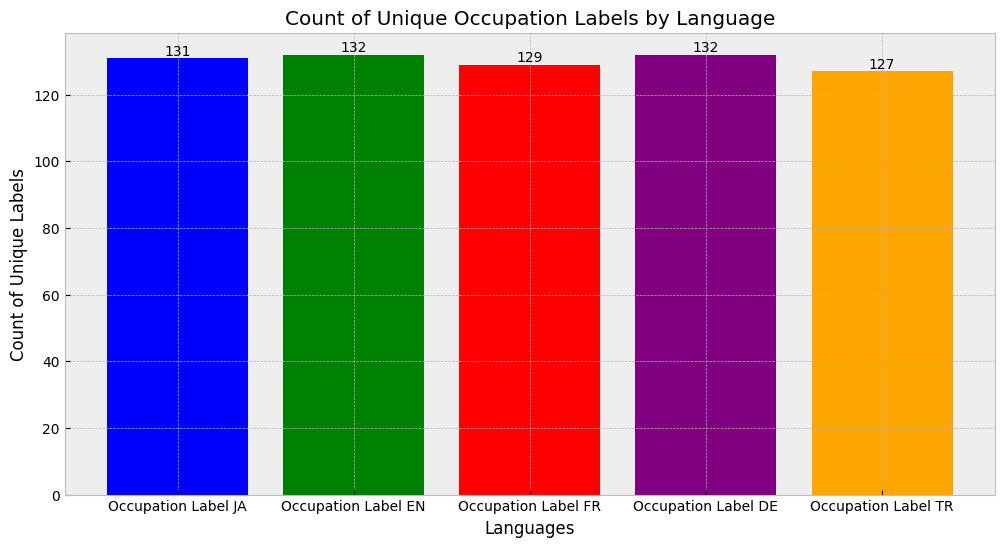

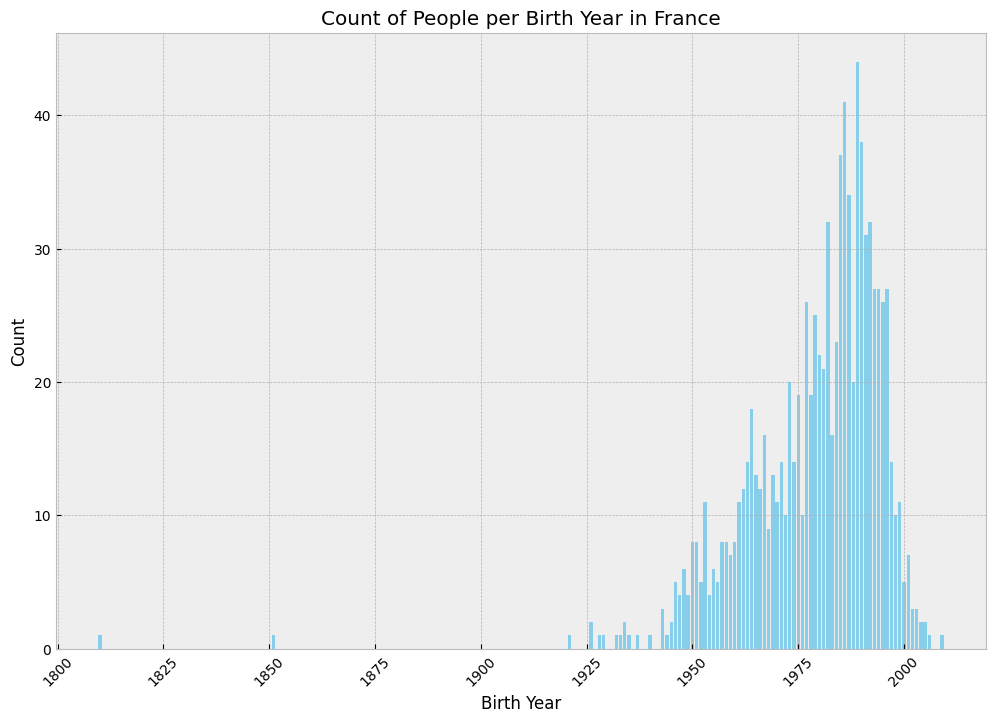

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_french[most_common_french['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_EN = most_common_french[most_common_french['Column Name'] == 'itemNameEN']['Unique Values'].values[0]
unique_values_TR = most_common_french[most_common_french['Column Name'] == 'itemNameTR']['Unique Values'].values[0]
unique_values_DE = most_common_french[most_common_french['Column Name'] == 'itemNameDE']['Unique Values'].values[0]
unique_values_JA = most_common_french[most_common_french['Column Name'] == 'itemNameJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_TR, unique_values_DE, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Person_Name_EN', 'Person_Name_TR', 'Person_Name_DE', 'Person_Name_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of French People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
counts_fr = [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]
# Maximum count for normalization (assuming 136 is the maximum based on your instruction)
max_count = 136

# Calculate percentages
percentages = [(value / max_count) * 100 for value in [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, 
                                                       unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, 
                                                       unique_values_OccupationLabelTR]]

# Labels for plotting
labels = ['Occupation Label JA', 'Occupation Label EN', 'Occupation Label FR', 'Occupation Label DE', 'Occupation Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_fr = plt.bar(labels, counts_fr, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_fr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
birth_year_counts_fr = french_people['birthYear'].value_counts().sort_index()

# Plotting the counts per birth year
plt.figure(figsize=(12, 8))
plt.bar(birth_year_counts_fr.index, birth_year_counts_fr.values, color='skyblue')
plt.title('Count of People per Birth Year in France')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
plt.grid(True)
plt.show()


### The first graph shows us the percentage of people who's names are translated to the benchmarked languages 

### The second graph shows us the percentage of people who's jobs are translated to the benchmarked languages


##  German PEOPLE STATISTICS
We will now explore how many mappings do we have for the extracted data on German people

In [11]:
display(most_common_german)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q70429, http:/...","[1, 1, 1, 1, 1]",1000
1,itemNameEN,object,"[Hermann Gröhe, Jörg Sprave, Denis Howell, Chr...","[1, 1, 1, 1, 1]",1000
2,itemNameFR,object,"[Hermann Gröhe, Metrickz, Erik Marquardt, Sato...","[1, 1, 1, 1, 1]",956
3,itemNameDE,object,"[Hermann Gröhe, Oleh Wynnyk, Alvaro Soler, Man...","[1, 1, 1, 1, 1]",977
4,itemNameTR,object,"[Hermann Gröhe, Paul Ziemiak, Nina Willburger,...","[1, 1, 1, 1, 1]",379
5,itemNameJA,object,"[ヘルマン・グレーエ, トーマス・D, マライカ・ミハンボ, マット・フレイ, ピア・シュナ...","[1, 1, 1, 1, 1]",420
6,singleOccupationLabelJA,object,"[政治家, ラッパー, ジャーナリスト, サッカー選手, YouTuber]","[81, 74, 69, 60, 59]",147
7,singleOccupationLabelEN,object,"[politician, rapper, journalist, association f...","[81, 74, 69, 60, 59]",147
8,singleOccupationLabelFR,object,"[personnalité politique, rappeur ou rappeuse, ...","[81, 74, 69, 60, 59]",143
9,singleOccupationLabelDE,object,"[Politiker, Rapper, Journalist, Fußballspieler...","[81, 74, 69, 60, 59]",146


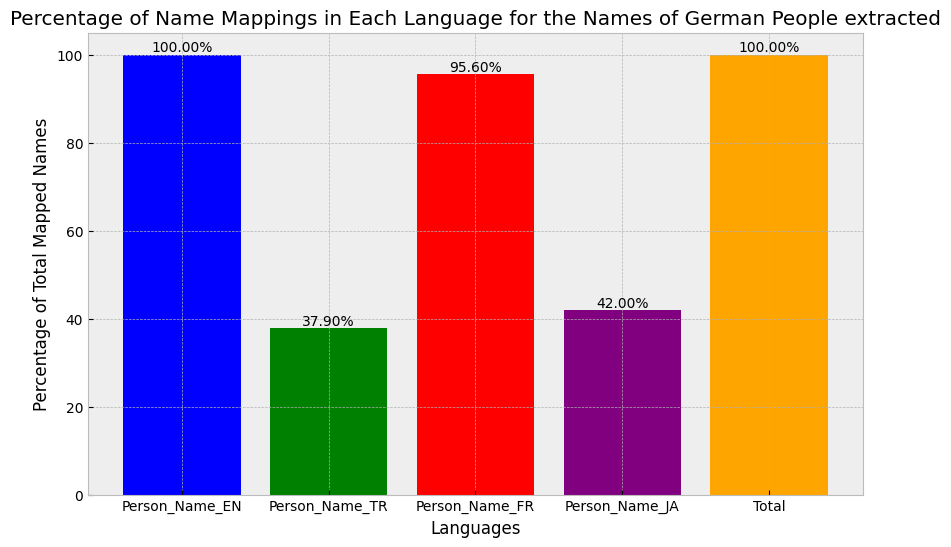

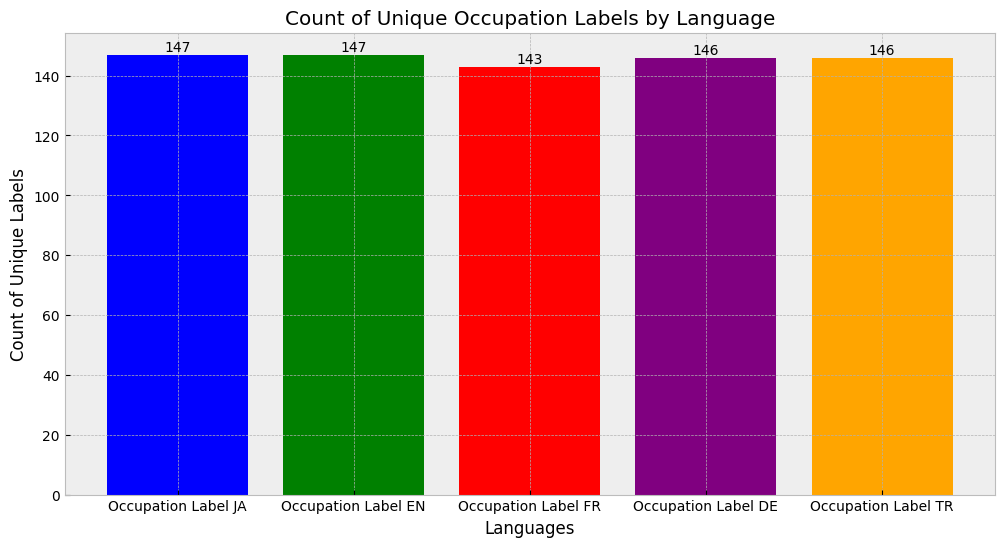

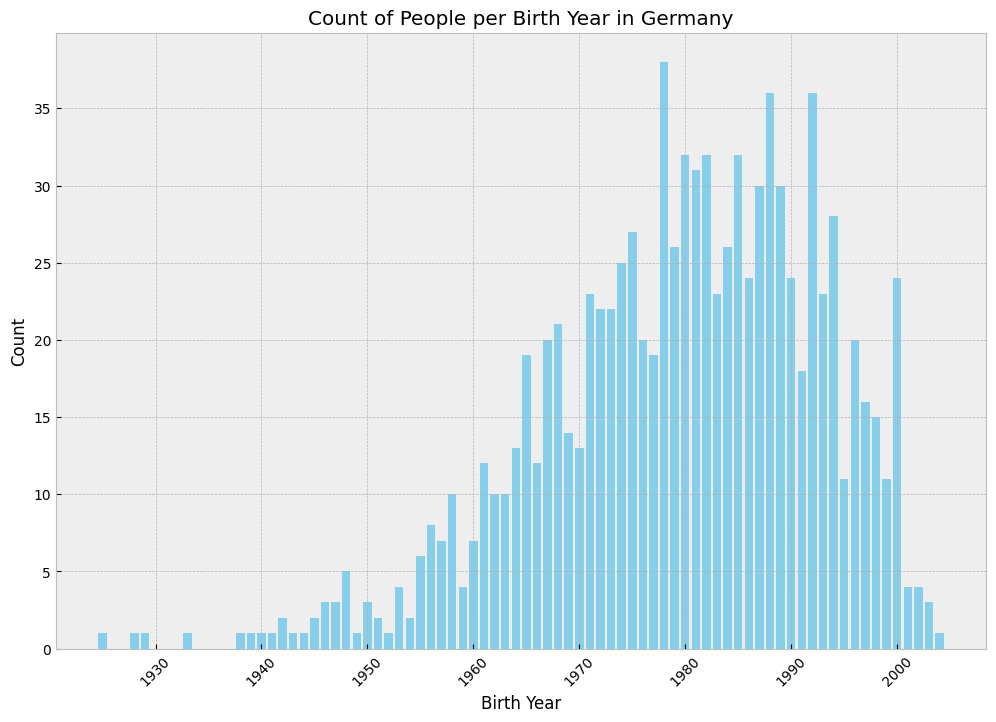

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_german[most_common_german['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_EN = most_common_german[most_common_german['Column Name'] == 'itemNameEN']['Unique Values'].values[0]
unique_values_TR = most_common_german[most_common_german['Column Name'] == 'itemNameTR']['Unique Values'].values[0]
unique_values_FR = most_common_german[most_common_german['Column Name'] == 'itemNameFR']['Unique Values'].values[0]
unique_values_JA = most_common_german[most_common_german['Column Name'] == 'itemNameJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_TR, unique_values_FR, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Person_Name_EN', 'Person_Name_TR', 'Person_Name_FR', 'Person_Name_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of German People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_german[most_common_german['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_german[most_common_german['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_german[most_common_german['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_german[most_common_german['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_german[most_common_german['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]

# Instead of calculating percentages, use the absolute numbers directly
counts_de = [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]

# Labels for plotting
labels = ['Occupation Label JA', 'Occupation Label EN', 'Occupation Label FR', 'Occupation Label DE', 'Occupation Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_de = plt.bar(labels, counts_de, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_de:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
birth_year_counts_de = german_people['birthYear'].value_counts().sort_index()

# Plotting the counts per birth year
plt.figure(figsize=(12, 8))
plt.bar(birth_year_counts_de.index, birth_year_counts_de.values, color='skyblue')
plt.title('Count of People per Birth Year in Germany')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
plt.grid(True)
plt.show()


### These graphs show that only 37% of all german people, meaning 370 people from the extracted German people have a Turkish name adapted

### whereas 94% or 940 of German people have a translated French name


##  Turkish PEOPLE STATISTICS
We will now explore how many mappings do we have for the extracted data on German people

In [13]:
display(most_common_turkish)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q77039, http:/...","[1, 1, 1, 1, 1]",1000
1,itemNameEN,object,"[Yusuf Başer, Meryem Uzerli, İrem Derici, İlha...","[2, 1, 1, 1, 1]",999
2,itemNameFR,object,"[Yusuf Başer, Meriem Userli, Markar Esayan, İs...","[2, 1, 1, 1, 1]",873
3,itemNameDE,object,"[Meryem Uzerli, Uraz Kaygılaroğlu, Ayşe Arman,...","[1, 1, 1, 1, 1]",684
4,itemNameTR,object,"[Yusuf Başer, Meryem Uzerli, İrem Derici, İlha...","[2, 1, 1, 1, 1]",989
5,itemNameJA,object,"[メルイェム・ウゼルリ, ジェム・オズデミル, アイマン・ヌール, クヴァンツ・タトルトゥー...","[1, 1, 1, 1, 1]",189
6,singleOccupationLabelJA,object,"[政治家, ジャーナリスト, 歌手, 俳優, 映画俳優]","[227, 151, 69, 54, 50]",112
7,singleOccupationLabelEN,object,"[politician, journalist, singer, actor, film a...","[226, 151, 69, 54, 50]",113
8,singleOccupationLabelFR,object,"[personnalité politique, journaliste, chanteur...","[226, 151, 69, 54, 50]",113
9,singleOccupationLabelDE,object,"[Politiker, Journalist, Sänger, Schauspieler, ...","[226, 151, 69, 54, 50]",113


In [15]:
print(unique_values_OccupationLabelDE)

146


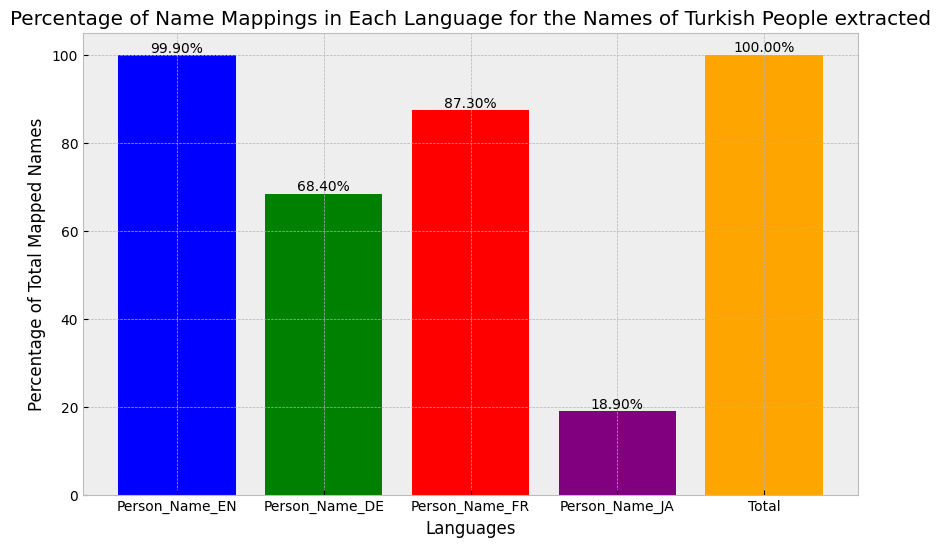

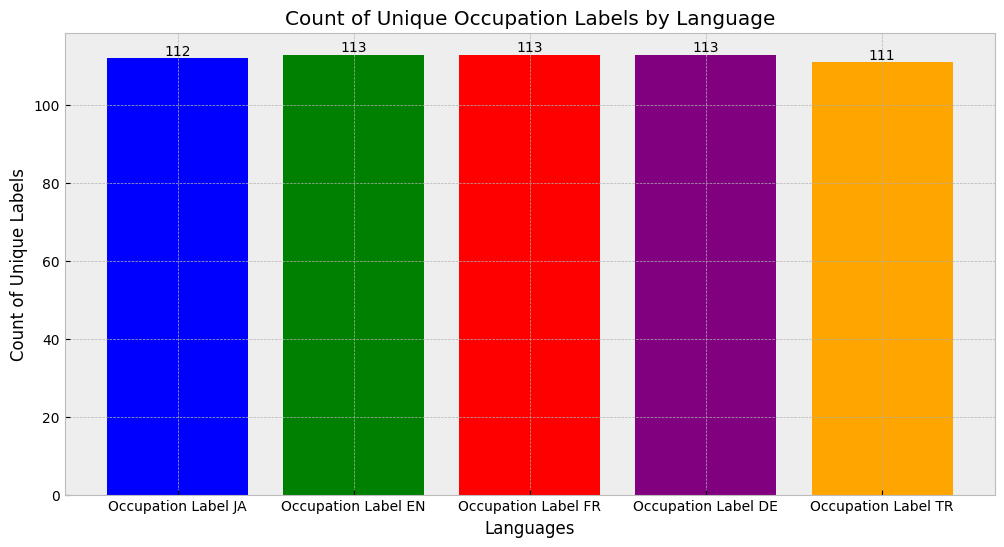

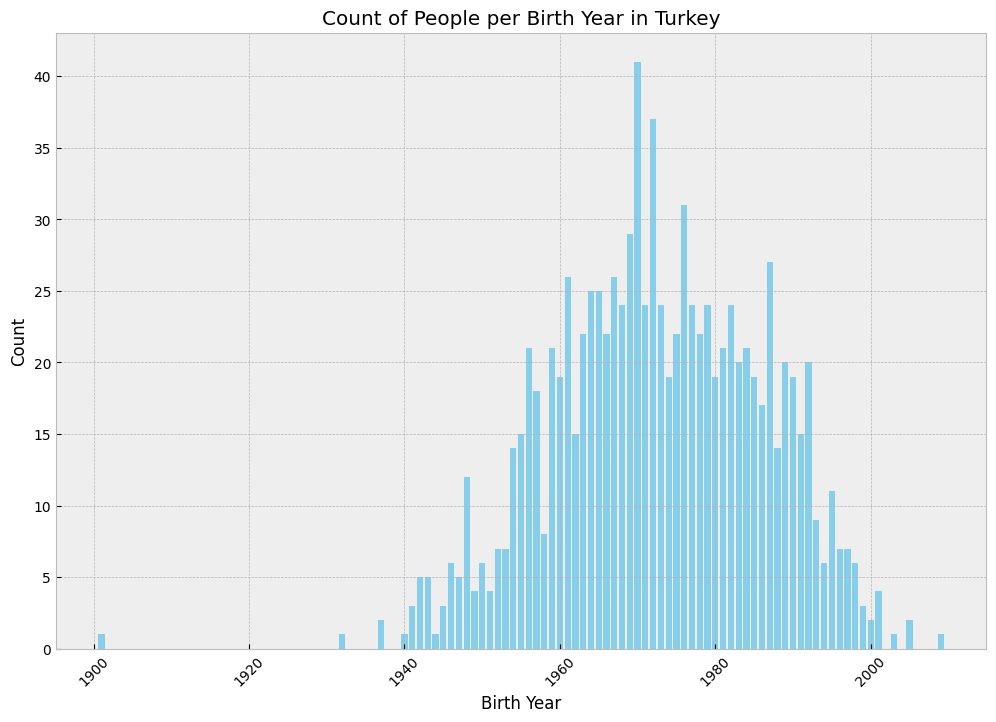

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_turkish[most_common_turkish['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_EN = most_common_turkish[most_common_turkish['Column Name'] == 'itemNameEN']['Unique Values'].values[0]
unique_values_DE = most_common_turkish[most_common_turkish['Column Name'] == 'itemNameDE']['Unique Values'].values[0]
unique_values_FR = most_common_turkish[most_common_turkish['Column Name'] == 'itemNameFR']['Unique Values'].values[0]
unique_values_JA = most_common_turkish[most_common_turkish['Column Name'] == 'itemNameJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_DE, unique_values_FR, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Person_Name_EN', 'Person_Name_DE', 'Person_Name_FR', 'Person_Name_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of Turkish People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_turkish[most_common_turkish['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_turkish[most_common_turkish['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_turkish[most_common_turkish['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_turkish[most_common_turkish['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_turkish[most_common_turkish['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
# Instead of calculating percentages, use the absolute numbers directly
counts_tr = [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]

# Labels for plotting
labels = ['Occupation Label JA', 'Occupation Label EN', 'Occupation Label FR', 'Occupation Label DE', 'Occupation Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_tr = plt.bar(labels, counts_tr, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_tr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
birth_year_counts_tr = turkish_people['birthYear'].value_counts().sort_index()

# Plotting the counts per birth year
plt.figure(figsize=(12, 8))
plt.bar(birth_year_counts_tr.index, birth_year_counts_tr.values, color='skyblue')
plt.title('Count of People per Birth Year in Turkey')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
plt.grid(True)
plt.show()



##  Japanese PEOPLE STATISTICS
We will now explore how many mappings do we have for the extracted data on German people

In [17]:
display(most_common_japanese)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q202054, http:...","[1, 1, 1, 1, 1]",1000
1,itemNameEN,object,"[Nanao, Tetsuya, Kōji Seto, Daigo, Maki Hojo]","[2, 2, 2, 2, 1]",996
2,itemNameFR,object,"[Keisuke Honda, Kitaro, Kazuhiro Kiyohara, Nao...","[1, 1, 1, 1, 1]",645
3,itemNameDE,object,"[Keisuke Honda, Rumiko Takahashi, Kasumi Arimu...","[1, 1, 1, 1, 1]",481
4,itemNameTR,object,"[Kōji Seto, Keisuke Honda, Tsunku, Hiroshi Tan...","[2, 1, 1, 1, 1]",759
5,itemNameJA,object,"[本田圭佑, 與真司郎, 愛沢えみり, 有吉弘行, chay]","[1, 1, 1, 1, 1]",999
6,singleOccupationLabelJA,object,"[YouTuber, モデル, 日本の声優, タレント, イラストレーター]","[80, 77, 71, 66, 60]",119
7,singleOccupationLabelEN,object,"[YouTuber, model, seiyū, tarento, illustrator]","[80, 77, 71, 66, 60]",121
8,singleOccupationLabelFR,object,"[YouTubeur ou YouTubeuse, mannequin, seiyū, ta...","[80, 77, 71, 66, 60]",120
9,singleOccupationLabelDE,object,"[YouTuber, Model, Seiyū, Tarento, Illustrator]","[80, 77, 71, 66, 60]",120


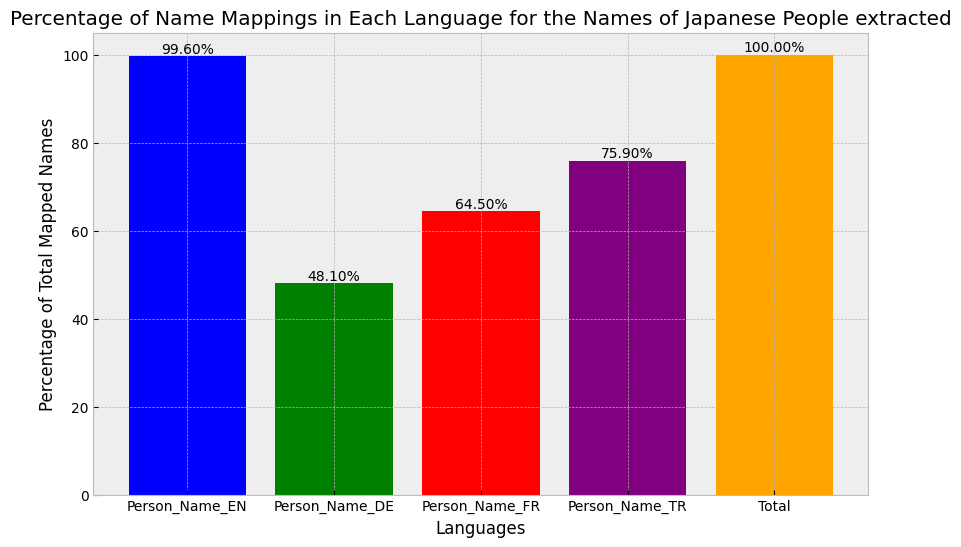

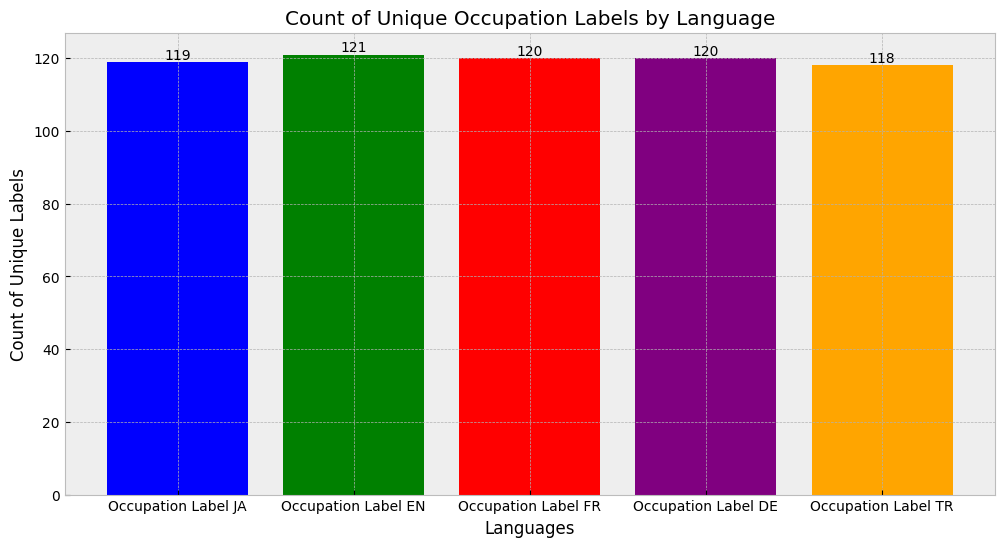

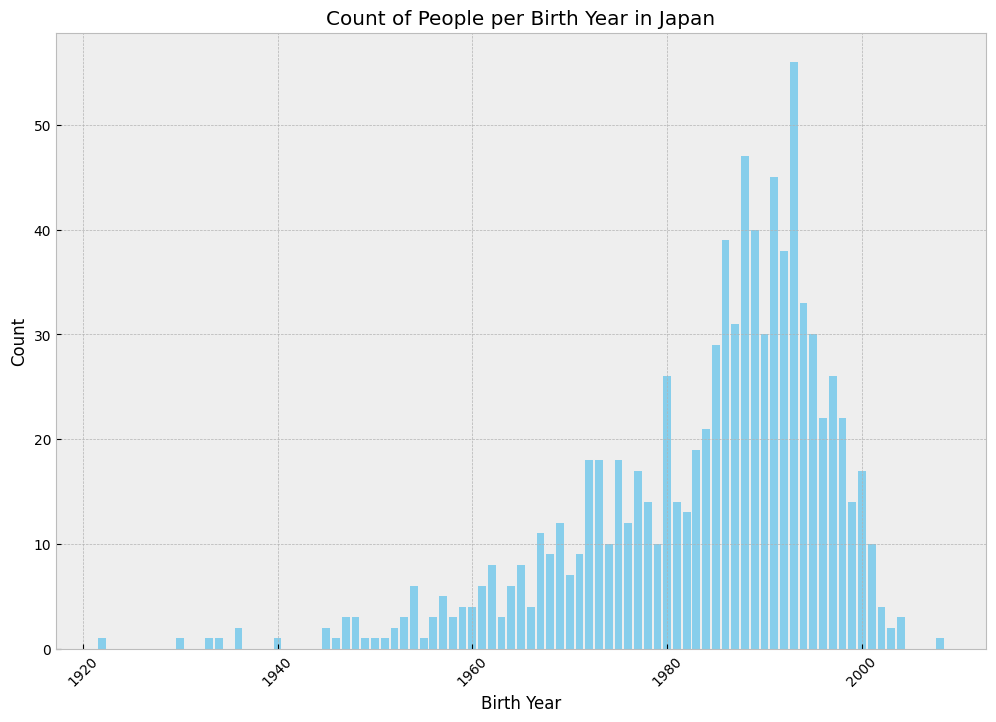

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_japanese[most_common_japanese['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_EN = most_common_japanese[most_common_japanese['Column Name'] == 'itemNameEN']['Unique Values'].values[0]
unique_values_DE = most_common_japanese[most_common_japanese['Column Name'] == 'itemNameDE']['Unique Values'].values[0]
unique_values_FR = most_common_japanese[most_common_japanese['Column Name'] == 'itemNameFR']['Unique Values'].values[0]
unique_values_TR = most_common_japanese[most_common_japanese['Column Name'] == 'itemNameTR']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_DE, unique_values_FR, unique_values_TR, unique_values_item]]

# Labels for plotting
labels = ['Person_Name_EN', 'Person_Name_DE', 'Person_Name_FR', 'Person_Name_TR', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of Japanese People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_japanese[most_common_japanese['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_japanese[most_common_japanese['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_japanese[most_common_japanese['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_japanese[most_common_japanese['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_japanese[most_common_japanese['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
# Instead of calculating percentages, use the absolute numbers directly
counts_ja=[unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]

# Labels for plotting
labels = ['Occupation Label JA', 'Occupation Label EN', 'Occupation Label FR', 'Occupation Label DE', 'Occupation Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_ja = plt.bar(labels, counts_ja, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_ja:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
birth_year_counts_ja = japan_people['birthYear'].value_counts().sort_index()

# Plotting the counts per birth year
plt.figure(figsize=(12, 8))
plt.bar(birth_year_counts_ja.index, birth_year_counts_ja.values, color='skyblue')
plt.title('Count of People per Birth Year in Japan')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
plt.grid(True)
plt.show()



##  English PEOPLE STATISTICS
We will now explore how many mappings do we have for the extracted data on German people

In [20]:
display(most_common_english)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q76139, http:/...","[1, 1, 1, 1, 1]",1000
1,itemNameEN,object,"[Tom Holland, Alex Reid, Gerry Adams, Jason Ro...","[2, 2, 1, 1, 1]",998
2,itemNameFR,object,"[Tom Holland, Alex Reid, Gerry Adams, Gok Wan,...","[2, 2, 1, 1, 1]",967
3,itemNameDE,object,"[Tom Holland, Alex Reid, Gerry Adams, Gok Wan,...","[2, 2, 1, 1, 1]",957
4,itemNameTR,object,"[Gerry Adams, Greg Davies, Nikki Cross, Matty ...","[1, 1, 1, 1, 1]",538
5,itemNameJA,object,"[トム・ホランド, ジェリー・アダムズ, アレックス・ベレスフォード, ダニー・ウィレット,...","[2, 1, 1, 1, 1]",687
6,singleOccupationLabelJA,object,"[映画俳優, サッカー選手, ジャーナリスト, レコーディング・アーティスト, YouTuber]","[129, 66, 63, 52, 43]",143
7,singleOccupationLabelEN,object,"[film actor, association football player, jour...","[129, 66, 63, 52, 43]",143
8,singleOccupationLabelFR,object,"[acteur ou actrice de cinéma, footballeur, jou...","[129, 66, 63, 52, 43]",140
9,singleOccupationLabelDE,object,"[Filmschauspieler, Fußballspieler, Journalist,...","[129, 66, 63, 52, 43]",143


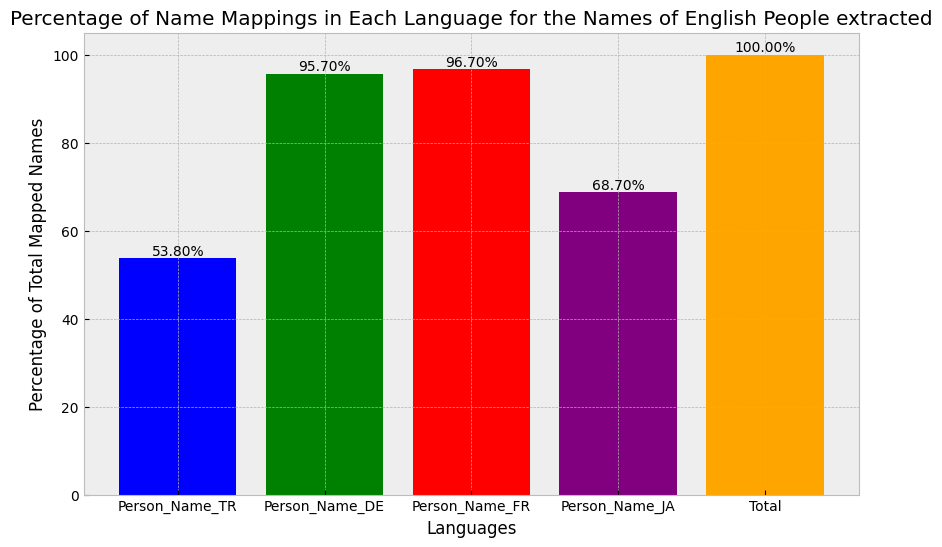

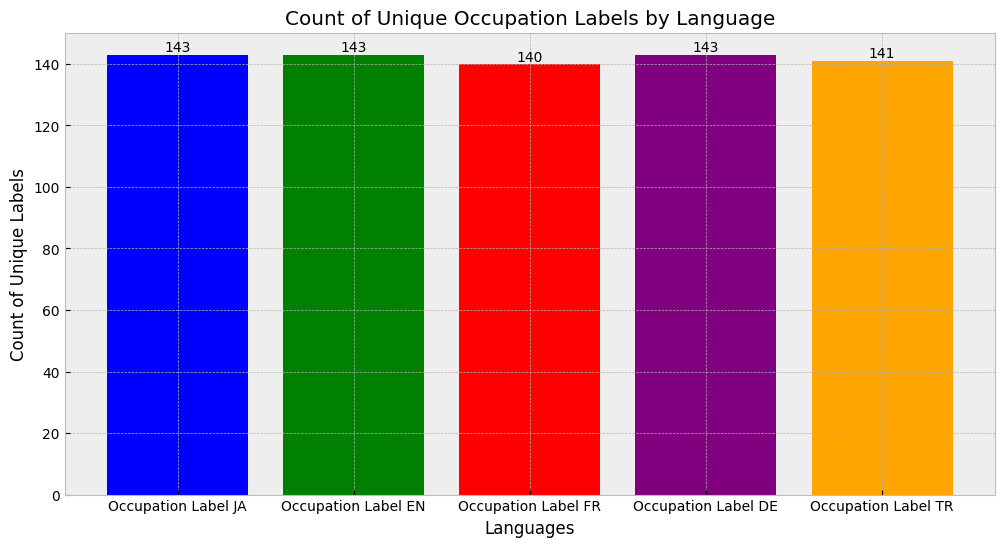

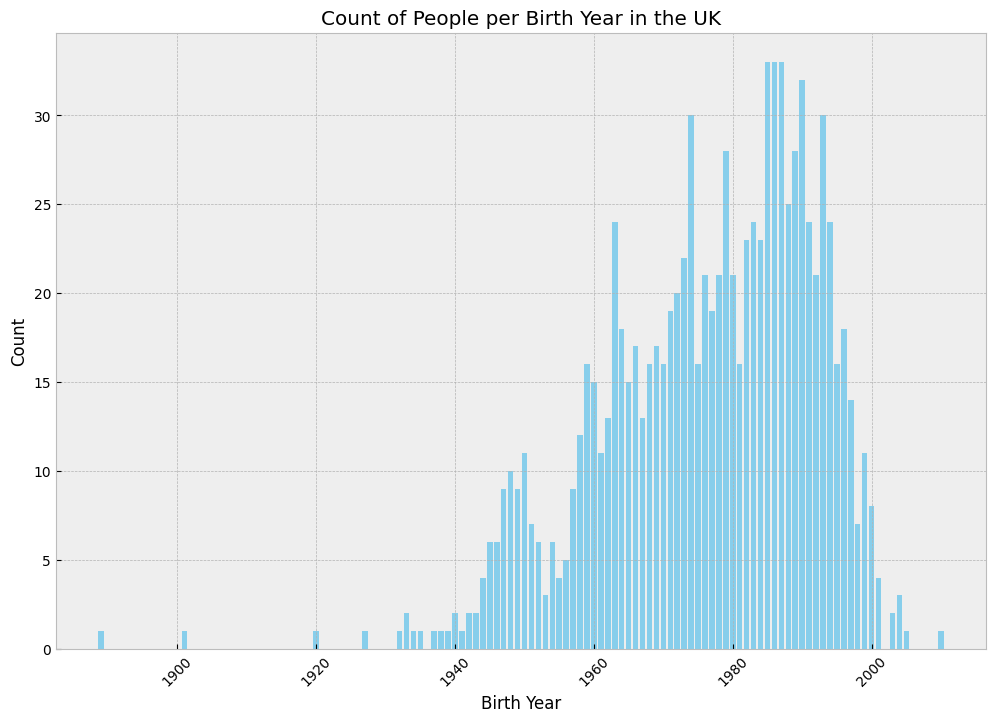

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_english[most_common_english['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_TR = most_common_english[most_common_english['Column Name'] == 'itemNameTR']['Unique Values'].values[0]
unique_values_DE = most_common_english[most_common_english['Column Name'] == 'itemNameDE']['Unique Values'].values[0]
unique_values_FR = most_common_english[most_common_english['Column Name'] == 'itemNameFR']['Unique Values'].values[0]
unique_values_JA = most_common_english[most_common_english['Column Name'] == 'itemNameJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_TR, unique_values_DE, unique_values_FR, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Person_Name_TR', 'Person_Name_DE', 'Person_Name_FR', 'Person_Name_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of English People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_english[most_common_english['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_english[most_common_english['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_english[most_common_english['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_english[most_common_english['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_english[most_common_english['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
# Instead of calculating percentages, use the absolute numbers directly
counts = [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]

# Labels for plotting
labels = ['Occupation Label JA', 'Occupation Label EN', 'Occupation Label FR', 'Occupation Label DE', 'Occupation Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Counting the number of occurrences of each birth year
birth_year_counts_uk = uk_people['birthYear'].value_counts().sort_index()

# Plotting the counts per birth year
plt.figure(figsize=(12, 8))
plt.bar(birth_year_counts_uk.index, birth_year_counts_uk.values, color='skyblue')
plt.title('Count of People per Birth Year in the UK')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
plt.grid(True)
plt.show()


# The percentage of mappings:
## These percentages were looked at to see if there are any big disrenpencies between the total counts of people and if their names were also translated to the benchmarked langauges. 
### This is specifically important as to check for cross-lingual bias in LLMs we will querry every single person's occupation and nationality, although we get low percentages for Turkish, and Japaneese we obtain high percentages for occupations.


### The percentages of occupations are very high for most languages, meaning that we can effectively querry all these people  by using their respective names in all 5 languages and their occupations as well as their nationality to ask LLMs and see if there are any different responses with respect to the languages asked

# Now we will check our data for events extracted from wikidata

We have decided to regroup or make a unique dataset for events that take place around the world since the data notation is not great. Meaning countries that there is a big imbalance in counts of these events between countries. As sseen in the data, Trueky for example only has 37 noted events whereas the US has more than 350 events 

In [22]:
# Define the SPARQL endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

#The SPAQRL querry to gather events that origiante from our benchamrked countries.
sparql_query = """
SELECT DISTINCT
  ?item
  (SAMPLE(?itemLabel_EN) AS ?itemLabel_EN)
  (SAMPLE(?itemLabel_DE) AS ?itemLabel_DE)
  (SAMPLE(?itemLabel_FR) AS ?itemLabel_FR)
  (SAMPLE(?itemLabel_JA) AS ?itemLabel_JA)
  (SAMPLE(?itemLabel_TR) AS ?itemLabel_TR)
  (SAMPLE(?countryLabel_EN) AS ?countryLabel_EN)
  (SAMPLE(?countryLabel_DE) AS ?countryLabel_DE)
  (SAMPLE(?countryLabel_FR) AS ?countryLabel_FR)
  (SAMPLE(?countryLabel_JA) AS ?countryLabel_JA)
  (SAMPLE(?countryLabel_TR) AS ?countryLabel_TR)
  (SAMPLE(?year) AS ?year)
  (SAMPLE(?participantLabel_EN) AS ?participantLabel_EN)
  (SAMPLE(?participantLabel_DE) AS ?participantLabel_DE)
  (SAMPLE(?participantLabel_FR) AS ?participantLabel_FR)
  (SAMPLE(?participantLabel_JA) AS ?participantLabel_JA)
  (SAMPLE(?participantLabel_TR) AS ?participantLabel_TR)
  (SAMPLE(?effectLabel_EN) AS ?effectLabel_EN)
  (SAMPLE(?effectLabel_DE) AS ?effectLabel_DE)
  (SAMPLE(?effectLabel_FR) AS ?effectLabel_FR)
  (SAMPLE(?effectLabel_JA) AS ?effectLabel_JA)
  (SAMPLE(?effectLabel_TR) AS ?effectLabel_TR)
WHERE {
  {
    SELECT DISTINCT ?item ?country ?year WHERE {
      ?item p:P31 ?statement0.
      ?statement0 ps:P31 ?type.
      {
        ?type (wdt:P279*) wd:Q21075805  # Significance
      }
      UNION
      {
        ?type (wdt:P279*) wd:Q13418847  # Historical Event
      }
      ?item wdt:P17 ?country.
      VALUES ?country { wd:Q30 wd:Q142 wd:Q145 wd:Q17 wd:Q183 wd:Q43 }
      OPTIONAL { ?item wdt:P585 ?date. BIND(YEAR(?date) AS ?year) }
    }
    LIMIT 5000
  }
  OPTIONAL { ?item rdfs:label ?itemLabel_EN FILTER(LANG(?itemLabel_EN) = "en") }
  OPTIONAL { ?item rdfs:label ?itemLabel_DE FILTER(LANG(?itemLabel_DE) = "de") }
  OPTIONAL { ?item rdfs:label ?itemLabel_FR FILTER(LANG(?itemLabel_FR) = "fr") }
  OPTIONAL { ?item rdfs:label ?itemLabel_JA FILTER(LANG(?itemLabel_JA) = "ja") }
  OPTIONAL { ?item rdfs:label ?itemLabel_TR FILTER(LANG(?itemLabel_TR) = "tr") }
  
  OPTIONAL { ?country rdfs:label ?countryLabel_EN FILTER(LANG(?countryLabel_EN) = "en") }
  OPTIONAL { ?country rdfs:label ?countryLabel_DE FILTER(LANG(?countryLabel_DE) = "de") }
  OPTIONAL { ?country rdfs:label ?countryLabel_FR FILTER(LANG(?countryLabel_FR) = "fr") }
  OPTIONAL { ?country rdfs:label ?countryLabel_JA FILTER(LANG(?countryLabel_JA) = "ja") }
  OPTIONAL { ?country rdfs:label ?countryLabel_TR FILTER(LANG(?countryLabel_TR) = "tr") }

  OPTIONAL {
    ?item wdt:P710 ?participant.
    OPTIONAL { ?participant rdfs:label ?participantLabel_EN FILTER(LANG(?participantLabel_EN) = "en") }
    OPTIONAL { ?participant rdfs:label ?participantLabel_DE FILTER(LANG(?participantLabel_DE) = "de") }
    OPTIONAL { ?participant rdfs:label ?participantLabel_FR FILTER(LANG(?participantLabel_FR) = "fr") }
    OPTIONAL { ?participant rdfs:label ?participantLabel_JA FILTER(LANG(?participantLabel_JA) = "ja") }
    OPTIONAL { ?participant rdfs:label ?participantLabel_TR FILTER(LANG(?participantLabel_TR) = "tr") }
  }

  OPTIONAL { ?item wdt:P580 ?startDate. }
  OPTIONAL { ?item wdt:P582 ?endDate. }
  OPTIONAL { ?item wdt:P276 ?location. ?location rdfs:label ?locationLabel_EN FILTER(LANG(?locationLabel_EN) = "en") }
  OPTIONAL { ?item wdt:P828 ?cause. ?cause rdfs:label ?causeLabel_EN FILTER(LANG(?causeLabel_EN) = "en") }
  
  OPTIONAL {
    ?item wdt:P1542 ?effect.
    OPTIONAL { ?effect rdfs:label ?effectLabel_EN FILTER(LANG(?effectLabel_EN) = "en") }
    OPTIONAL { ?effect rdfs:label ?effectLabel_DE FILTER(LANG(?effectLabel_DE) = "de") }
    OPTIONAL { ?effect rdfs:label ?effectLabel_FR FILTER(LANG(?effectLabel_FR) = "fr") }
    OPTIONAL { ?effect rdfs:label ?effectLabel_JA FILTER(LANG(?effectLabel_JA) = "ja") }
    OPTIONAL { ?effect rdfs:label ?effectLabel_TR FILTER(LANG(?effectLabel_TR) = "tr") }
  }

  OPTIONAL { ?item wdt:P8408 ?culturalImpact. ?culturalImpact rdfs:label ?culturalImpactLabel_EN FILTER(LANG(?culturalImpactLabel_EN) = "en") }
  OPTIONAL { ?item wdt:P2131 ?economicImpact. }
  OPTIONAL { ?item wdt:P1120 ?casualties. }
}
GROUP BY ?item
LIMIT 5000
"""

# Set the query and return format to JSON
#sparql.setQuery(sparql_query)
#sparql.setReturnFormat(JSON)

# Execute the query and fetch the results
#results = sparql.query().convert()

# Print the results
#for result in results["results"]["bindings"]:
#    print(result)


In [19]:
import pandas as pd
import matplotlib as plt
events = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Events\Multi_Culture_Events.csv")


In [28]:
most_common_events = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
# Iterate over each column in the DataFrame
for column in events.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = events[column].value_counts().nlargest(5).index.tolist()
    counts = events[column].value_counts().nlargest(5).tolist()
    column_type = events[column].dtype
    unique_values = len(set(events[column]))

    # Append the results to the DataFrame
    most_common_events.loc[len(most_common_events)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}   


In [29]:
display(most_common_events)

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,item,object,"[http://www.wikidata.org/entity/Q4872730, http...","[1, 1, 1, 1, 1]",2445
1,itemLabel_EN,object,"[Battle of Arras, Siege of Paris, Siege of Arl...","[5, 5, 4, 4, 4]",2216
2,itemLabel_DE,object,"[Siege of Paris, Siege of Arles, Battle of Mar...","[4, 4, 3, 3, 3]",2280
3,itemLabel_FR,object,"[siège d'Arles, siège de Paris, bataille de Ma...","[4, 4, 4, 3, 3]",2259
4,itemLabel_JA,object,"[Siege of Arles, ヴェルダンの戦い, Battle of St. James...","[4, 3, 3, 3, 2]",2312
5,itemLabel_TR,object,"[Siege of Paris, Battle of Soissons, Siege of ...","[4, 4, 4, 4, 3]",2231
6,countryLabel_EN,object,"[France, United States of America, Japan, Germ...","[944, 878, 359, 117, 91]",6
7,countryLabel_DE,object,"[Frankreich, Vereinigte Staaten, Japan, Deutsc...","[944, 878, 359, 117, 91]",6
8,countryLabel_FR,object,"[France, États-Unis, Japon, Allemagne, Royaume...","[944, 878, 359, 117, 91]",6
9,countryLabel_JA,object,"[フランス, アメリカ合衆国, 日本, ドイツ, イギリス]","[944, 878, 359, 117, 91]",6


In [30]:
# List of language codes to update
lang_codes = ['DE', 'FR', 'JA', 'TR']  # Add other language codes if needed

# Update specific language columns with the English names where they are missing
for lang_code in lang_codes:
    name_column = f'itemLabel_{lang_code}'
    events[name_column] = events[name_column].fillna(events['itemLabel_EN'])

# Display the first few rows to verify the changes
events.head()

,item,itemLabel_EN,itemLabel_DE,itemLabel_FR,itemLabel_JA,itemLabel_TR,countryLabel_EN,countryLabel_DE,countryLabel_FR,countryLabel_JA,...,participantLabel_EN,participantLabel_DE,participantLabel_FR,participantLabel_JA,participantLabel_TR,effectLabel_EN,effectLabel_DE,effectLabel_FR,effectLabel_JA,effectLabel_TR
0,http://www.wikidata.org/entity/Q4872730,Battle of White Oak Swamp,Battle of White Oak Swamp,bataille de White Oak Swamp,ホワイトオーク湿地の戦い,Battle of White Oak Swamp,United States of America,Vereinigte Staaten,États-Unis,アメリカ合衆国,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q4872426,Battle of Springfield,Battle of Springfield,bataille de Springfield,スプリングフィールドの戦い (1780年),Battle of Springfield,United States of America,Vereinigte Staaten,États-Unis,アメリカ合衆国,...,United States of America,Vereinigte Staaten,États-Unis,アメリカ合衆国,Amerika Birleşik Devletleri,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q88849674,Battle of la Truyère,Battle of la Truyère,bataille de la Truyère,Battle of la Truyère,Battle of la Truyère,France,Frankreich,France,フランス,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q4870244,Battle of Alazan Creek,Battle of Alazan Creek,Battle of Alazan Creek,Battle of Alazan Creek,Battle of Alazan Creek,United States of America,Vereinigte Staaten,États-Unis,アメリカ合衆国,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q11608769,Battle of Mihonoseki,Battle of Mihonoseki,Battle of Mihonoseki,美保関の合戦,Battle of Mihonoseki,Japan,Japan,Japon,日本,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Count entries with at least 10 empty columns
entries_with_at_least_10_missing = events.isna().sum(axis=1).ge(11).sum()

print(f"Number of entries with at least 10 missing columns: {entries_with_at_least_10_missing}")


Number of entries with at least 10 missing columns: 375


In [32]:
#exporting csv
output_file_path = r"C:\Users\PC\Downloads\master_thesis\Datasets\Events\Multi_Culture_Events_filled.csv"
events.to_csv(output_file_path, index=False)

print(f"DataFrame exported to {output_file_path}")

DataFrame exported to C:\Users\PC\Downloads\master_thesis\Datasets\Events\Multi_Culture_Events_filled.csv


In [35]:
non_na_percentage = events.notna().mean().sort_values(ascending=False) * 100

# Create a DataFrame to display the results
non_na_summary = pd.DataFrame(non_na_percentage, columns=['Non-NA Percentage'])
non_na_summary.index.name = 'Column Name'
non_na_summary.reset_index(inplace=True)

# Display the columns with the least number of missing values
print(non_na_summary)

# If you want to see the top columns with the least number of missing values
top_non_na_columns = non_na_summary[non_na_summary['Non-NA Percentage'] > 50]  # Adjust the threshold as needed
print(top_non_na_columns)

            Column Name  Non-NA Percentage
0                  item         100.000000
1       countryLabel_EN         100.000000
2       countryLabel_DE         100.000000
3       countryLabel_FR         100.000000
4       countryLabel_JA         100.000000
5       countryLabel_TR         100.000000
6          itemLabel_JA          97.668712
7          itemLabel_FR          97.137014
8          itemLabel_DE          96.359918
9          itemLabel_TR          95.664622
10         itemLabel_EN          95.623722
11                 year          82.576687
12  participantLabel_EN          36.073620
13  participantLabel_JA          36.073620
14  participantLabel_FR          34.642127
15  participantLabel_DE          34.601227
16  participantLabel_TR          32.924335
17       effectLabel_JA           0.736196
18       effectLabel_EN           0.695297
19       effectLabel_DE           0.613497
20       effectLabel_FR           0.613497
21       effectLabel_TR           0.531697
        Col

AttributeError: module 'matplotlib' has no attribute 'title'

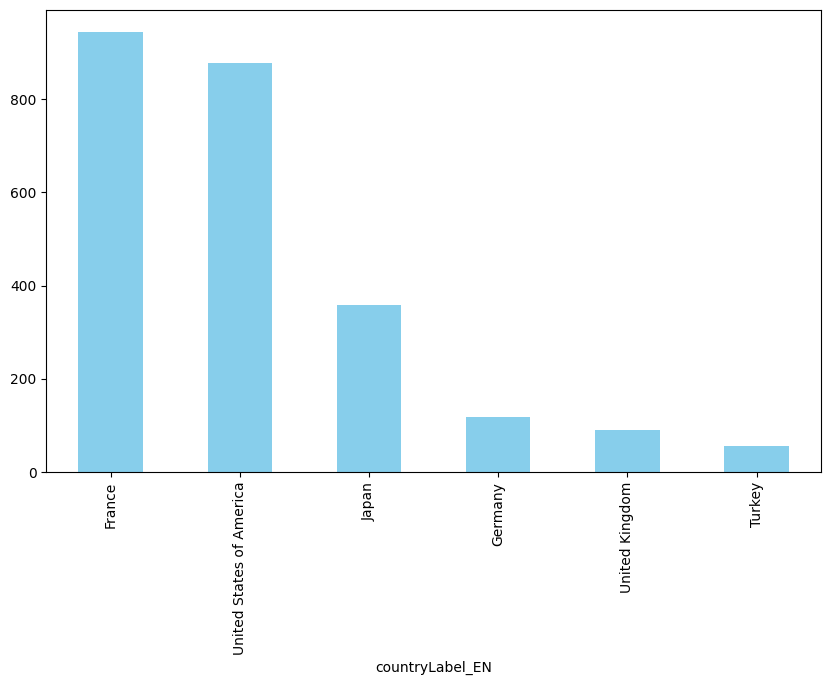

In [9]:
events['countryLabel_EN'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Events by Country')
plt.xlabel('Country')
plt.ylabel('Event Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
events['year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6), color='green')
plt.title('Number of Events Over Time')
plt.xlabel('Year')
plt.ylabel('Event Counts')
plt.tight_layout()
plt.show()
event_distribution = events.groupby(['year', 'countryLabel_EN']).size().unstack(fill_value=0)
event_distribution.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Event Distribution Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()


In [4]:
# Count the number of events per country
events_per_country = events['countryLabel_EN'].value_counts()

# Print the results
print(events_per_country)


countryLabel_EN
France                      944
United States of America    878
Japan                       359
Germany                     117
United Kingdom               91
Turkey                       56
Name: count, dtype: int64


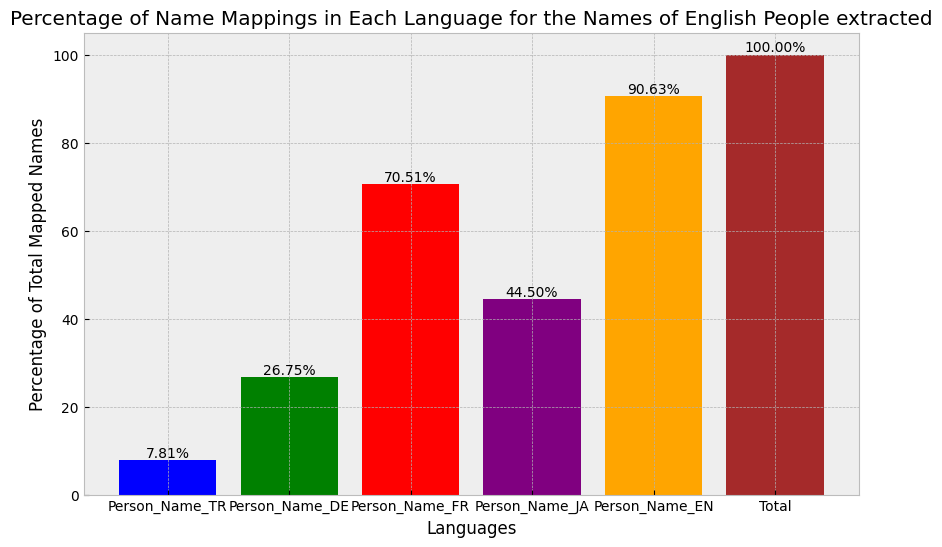

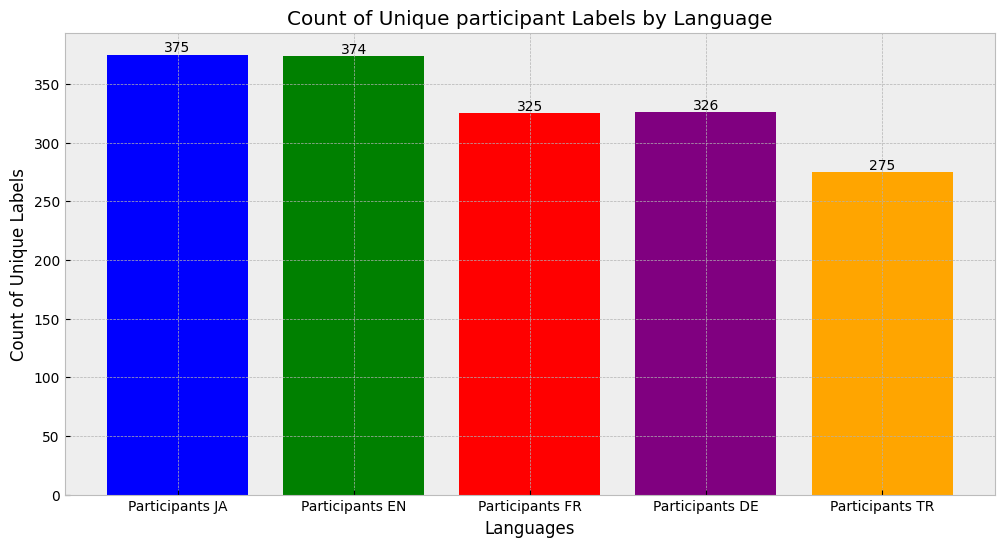

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_events[most_common_events['Column Name'] == 'item']['Unique Values'].values[0]
unique_values_EN = most_common_events[most_common_events['Column Name'] == 'itemLabel_EN']['Unique Values'].values[0]
unique_values_TR = most_common_events[most_common_events['Column Name'] == 'itemLabel_TR']['Unique Values'].values[0]
unique_values_DE = most_common_events[most_common_events['Column Name'] == 'itemLabel_DE']['Unique Values'].values[0]
unique_values_FR = most_common_events[most_common_events['Column Name'] == 'itemLabel_FR']['Unique Values'].values[0]
unique_values_JA = most_common_events[most_common_events['Column Name'] == 'itemLabel_JA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 2445 * 100 for count in [unique_values_TR, unique_values_DE, unique_values_FR, unique_values_JA, unique_values_EN, unique_values_item]]

# Labels for plotting, corrected to include the missing comma
labels = ['Person_Name_TR', 'Person_Name_DE', 'Person_Name_FR', 'Person_Name_JA', 'Person_Name_EN', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of English People extracted')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_OccupationLabelJA = most_common_events[most_common_events['Column Name'] == 'participantLabel_JA']['Unique Values'].values[0]
unique_values_OccupationLabelEN = most_common_events[most_common_events['Column Name'] == 'participantLabel_EN']['Unique Values'].values[0]
unique_values_OccupationLabelFR = most_common_events[most_common_events['Column Name'] == 'participantLabel_FR']['Unique Values'].values[0]
unique_values_OccupationLabelDE = most_common_events[most_common_events['Column Name'] == 'participantLabel_DE']['Unique Values'].values[0]
unique_values_OccupationLabelTR = most_common_events[most_common_events['Column Name'] == 'participantLabel_TR']['Unique Values'].values[0]
# Instead of calculating percentages, use the absolute numbers directly
counts = [unique_values_OccupationLabelJA, unique_values_OccupationLabelEN, unique_values_OccupationLabelFR, unique_values_OccupationLabelDE, unique_values_OccupationLabelTR]

# Labels for plotting
labels = ['Participants JA', 'Participants EN', 'Participants FR', 'Participants DE', 'Participants TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique participant Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels


# This thesis will also dvelve into the domains of physical locations and art

#### but because of the nature of these two objects, it is hard to querry and obtain a decent amount of data. Hence these two aspects are not presented in the Exploratory Data Analysis. But will be included as benchamrk domains in my thesis

In [28]:
places_DE = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Places\Arts&Monuments_DE.csv")
places_TR = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Places\Arts&Monuments_TR.csv")
places_UK = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Places\Arts&Monuments_UK.csv")
places_FR = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Places\Arts&Monuments_FR.csv")
places_JA = pd.read_csv(r"C:\Users\PC\Downloads\master_thesis\Datasets\Places\Arts&Monuments_JA.csv")


In [29]:
most_common_places_DE = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_places_TR = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_places_UK = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_places_FR = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
most_common_places_JA = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])

# Iterate over each column in the DataFrame
for column in places_TR.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = places_TR[column].value_counts().nlargest(5).index.tolist()
    counts = places_TR[column].value_counts().nlargest(5).tolist()
    column_type = places_TR[column].dtype
    unique_values = len(set(places_TR[column]))

    # Append the results to the DataFrame
    most_common_places_TR.loc[len(most_common_places_TR)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}   

for column in places_FR.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = places_FR[column].value_counts().nlargest(5).index.tolist()
    counts = places_FR[column].value_counts().nlargest(5).tolist()
    column_type = places_FR[column].dtype
    unique_values = len(set(places_FR[column]))

    # Append the results to the DataFrame
    most_common_places_FR.loc[len(most_common_places_FR)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}

for column in places_DE.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = places_DE[column].value_counts().nlargest(5).index.tolist()
    counts = places_DE[column].value_counts().nlargest(5).tolist()
    column_type = places_DE[column].dtype
    unique_values = len(set(places_DE[column]))

    # Append the results to the DataFrame
    most_common_places_DE.loc[len(most_common_places_DE)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
for column in places_JA.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = places_JA[column].value_counts().nlargest(5).index.tolist()
    counts = places_JA[column].value_counts().nlargest(5).tolist()
    column_type = places_JA[column].dtype
    unique_values = len(set(places_JA[column]))

    # Append the results to the DataFrame
    most_common_places_JA.loc[len(most_common_places_JA)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
    
for column in places_UK.columns:
    # Calculate the three most common values and their counts using value_counts
    most_common_values = places_UK[column].value_counts().nlargest(5).index.tolist()
    counts = places_UK[column].value_counts().nlargest(5).tolist()
    column_type = places_UK[column].dtype
    unique_values = len(set(places_UK[column]))

    # Append the results to the DataFrame
    most_common_places_UK.loc[len(most_common_places_UK)] = {'Column Name': column,
                                               "Column Type": column_type,
                                            'Most Common Values': most_common_values,
                                            'Counts': counts,
                                            'Unique Values': unique_values}
# Print the resulting DataFrame
#display(most_common_french)

In [30]:
most_common_places_FR

,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,place,object,"[http://www.wikidata.org/entity/Q96312764, htt...","[1, 1, 1, 1, 1]",1000
1,placeLabelEN,object,[Murals and interior of Saint-Julien in Brioud...,"[20, 7, 3, 3, 3]",782
2,placeLabelFR,object,"[Autoportrait, Sans titre, Nature morte, Pando...","[11, 6, 4, 3, 3]",743
3,placeLabelDE,object,"[Selbstporträt, Badende, Selbstbildnis, Urteil...","[2, 2, 2, 2, 2]",177
4,placeLabelTR,object,"[Mur pour la Paix, Büyük Odalık, Kırda Öğle Ye...","[1, 1, 1, 1, 1]",20
5,placeLabelJA,object,"[自画像, ヴィーナスの誕生, 平和の壁, ムーラン・ド・ラ・ギャレット, パリスの審判]","[6, 2, 1, 1, 1]",80
6,countryLabel,object,"[France, Egypt]","[104, 1]",3
7,creatorLabelEN,object,"[William-Adolphe Bouguereau, Paul-Émile Bordua...","[63, 42, 35, 32, 26]",384
8,creatorLabelFR,object,"[William Bouguereau, Paul-Émile Borduas, Georg...","[63, 42, 35, 32, 26]",383
9,creatorLabelDE,object,"[William Adolphe Bouguereau, Paul-Émile Bordua...","[63, 42, 35, 32, 26]",365


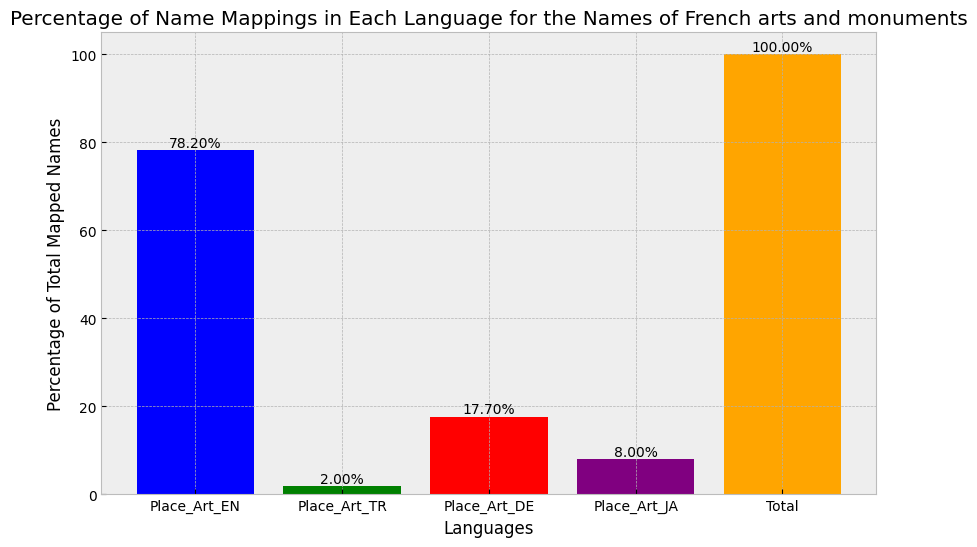

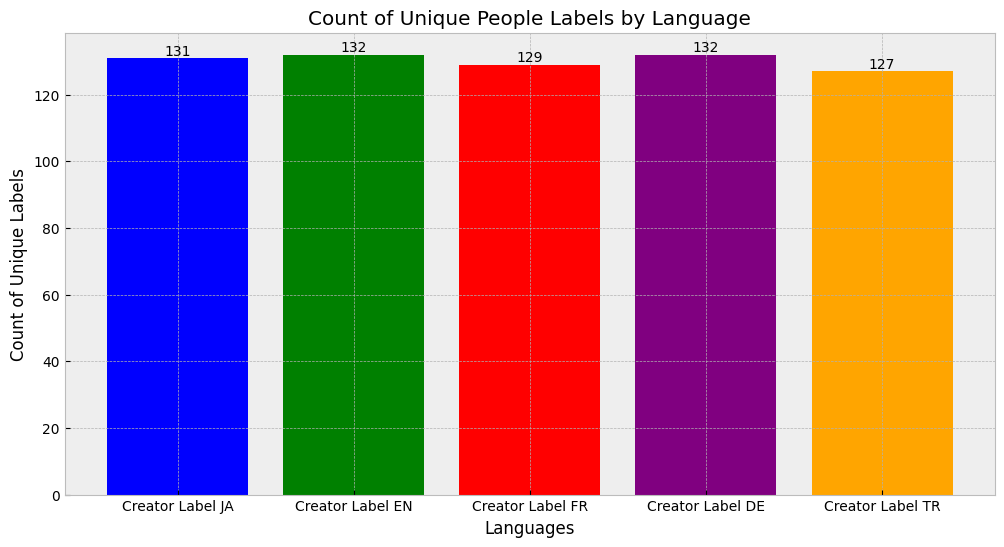

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_places_FR[most_common_places_FR['Column Name'] == 'place']['Unique Values'].values[0]
unique_values_EN = most_common_places_FR[most_common_places_FR['Column Name'] == 'placeLabelEN']['Unique Values'].values[0]
unique_values_TR = most_common_places_FR[most_common_places_FR['Column Name'] == 'placeLabelTR']['Unique Values'].values[0]
unique_values_DE = most_common_places_FR[most_common_places_FR['Column Name'] == 'placeLabelDE']['Unique Values'].values[0]
unique_values_JA = most_common_places_FR[most_common_places_FR['Column Name'] == 'placeLabelJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_TR, unique_values_DE, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Place_Art_EN', 'Place_Art_TR', 'Place_Art_DE', 'Place_Art_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of French arts and monuments')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_CratorLabelJA = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_CreatorLabelEN = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_CreatorLabelFR = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_CreatorLabelDE = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_CreatorLabelTR = most_common_french[most_common_french['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
counts_fr = [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, unique_values_CreatorLabelTR]
# Maximum count for normalization (assuming 136 is the maximum based on your instruction)
max_count = 136

# Calculate percentages
percentages = [(value / max_count) * 100 for value in [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, 
                                                       unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, 
                                                       unique_values_CreatorLabelTR]]

# Labels for plotting
labels = ['Creator Label JA', 'Creator Label EN', 'Creator Label FR', 'Creator Label DE', 'Creator Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_fr = plt.bar(labels, counts_fr, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique People Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_fr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
#birth_year_counts_fr = places_FR['dateCompleted'].value_counts().sort_index()

# Plotting the counts per birth year
#plt.figure(figsize=(12, 8))
#plt.bar(birth_year_counts_fr.index, birth_year_counts_fr.values, color='skyblue')
#plt.title('Count of People per Birth Year in France')
#plt.xlabel('Birth Year')
#plt.ylabel('Count')
#plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
#plt.grid(True)
#plt.show()


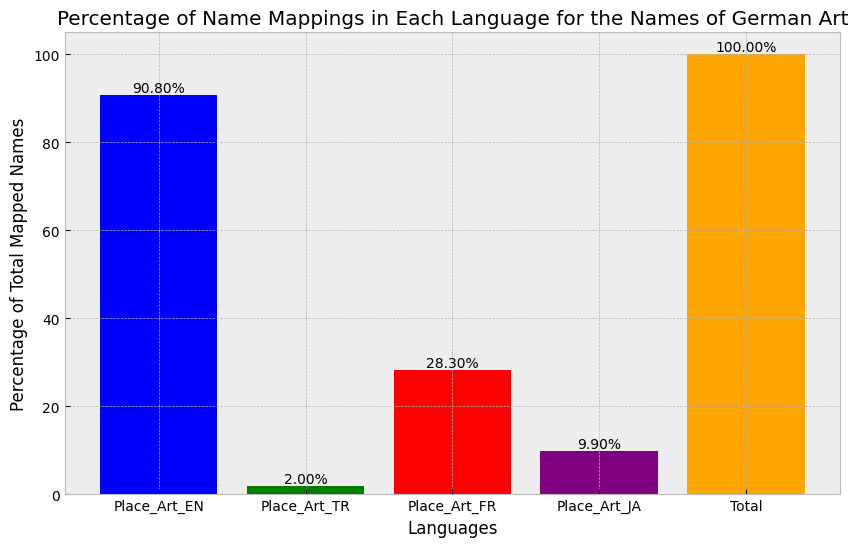

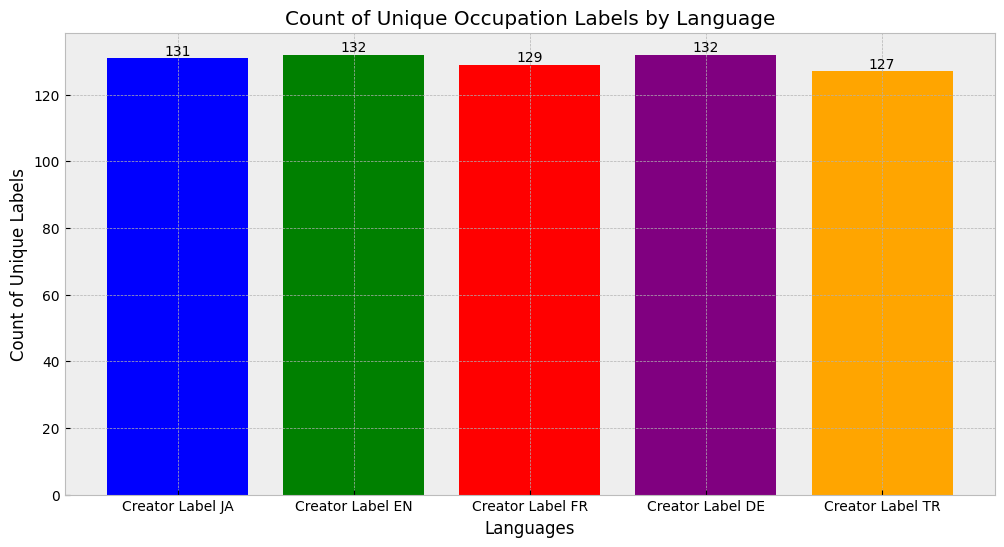

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_places_DE[most_common_places_DE['Column Name'] == 'place']['Unique Values'].values[0]
unique_values_EN = most_common_places_DE[most_common_places_DE['Column Name'] == 'placeLabelEN']['Unique Values'].values[0]
unique_values_TR = most_common_places_FR[most_common_places_DE['Column Name'] == 'placeLabelTR']['Unique Values'].values[0]
unique_values_FR = most_common_places_DE[most_common_places_DE['Column Name'] == 'placeLabelFR']['Unique Values'].values[0]
unique_values_JA = most_common_places_DE[most_common_places_DE['Column Name'] == 'placeLabelJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_EN, unique_values_TR, unique_values_FR, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Place_Art_EN', 'Place_Art_TR', 'Place_Art_FR', 'Place_Art_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of German Art')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_CratorLabelJA = most_common_places_DE[most_common_places_DE['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_CreatorLabelEN = most_common_places_DE[most_common_places_DE['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_CreatorLabelFR = most_common_places_DE[most_common_places_DE['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_CreatorLabelDE = most_common_french[most_common_places_DE['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_CreatorLabelTR = most_common_places_DE[most_common_places_DE['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
counts_fr = [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, unique_values_CreatorLabelTR]
# Maximum count for normalization (assuming 136 is the maximum based on your instruction)
max_count = 136

# Calculate percentages
percentages = [(value / max_count) * 100 for value in [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, 
                                                       unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, 
                                                       unique_values_CreatorLabelTR]]

# Labels for plotting
labels = ['Creator Label JA', 'Creator Label EN', 'Creator Label FR', 'Creator Label DE', 'Creator Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_fr = plt.bar(labels, counts_fr, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_fr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
#birth_year_counts_fr = places_FR['dateCompleted'].value_counts().sort_index()

# Plotting the counts per birth year
#plt.figure(figsize=(12, 8))
#plt.bar(birth_year_counts_fr.index, birth_year_counts_fr.values, color='skyblue')
#plt.title('Count of People per Birth Year in France')
#plt.xlabel('Birth Year')
#plt.ylabel('Count')
#plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
#plt.grid(True)
#plt.show()


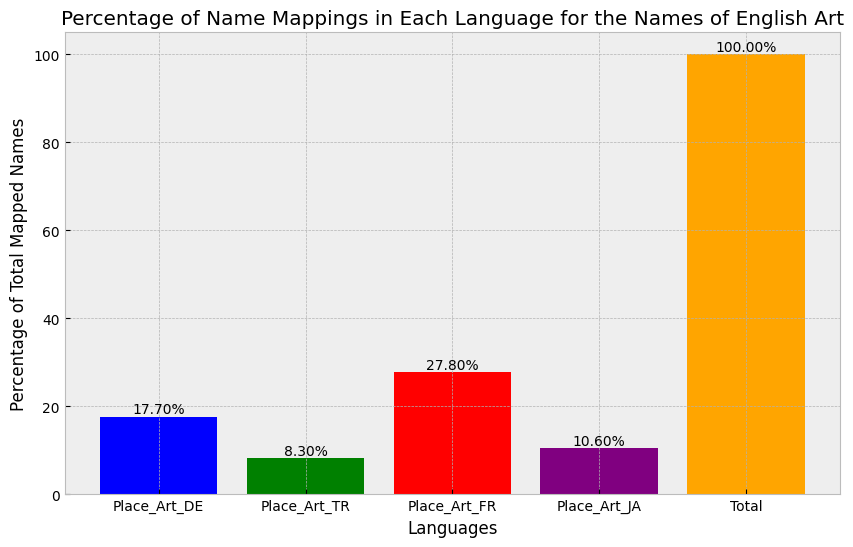

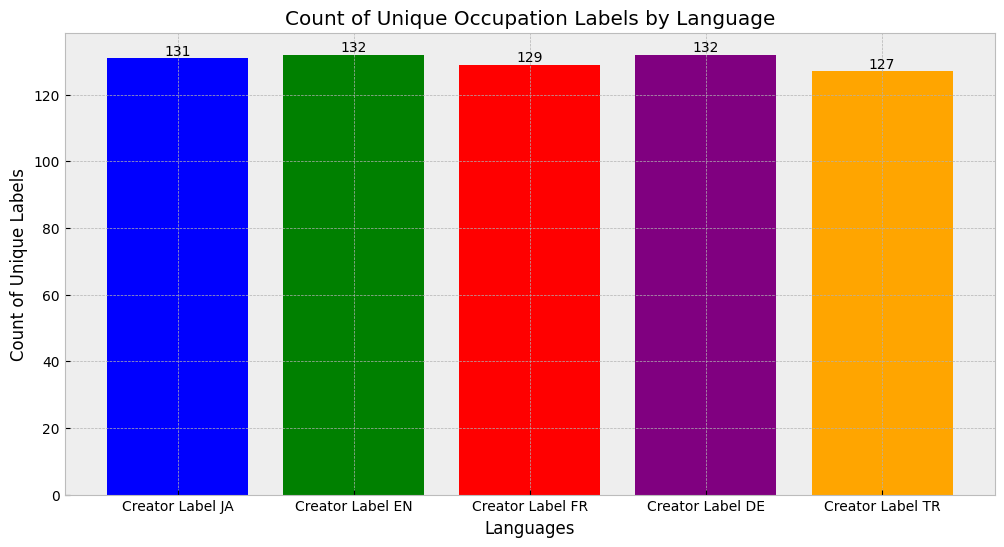

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming most_common_french DataFrame is defined and contains the data as described
# Extract unique values for the columns of interest
unique_values_item = most_common_places_UK[most_common_places_UK['Column Name'] == 'place']['Unique Values'].values[0]
unique_values_EN = most_common_places_UK[most_common_places_UK['Column Name'] == 'placeLabelDE']['Unique Values'].values[0]
unique_values_TR = most_common_places_UK[most_common_places_UK['Column Name'] == 'placeLabelTR']['Unique Values'].values[0]
unique_values_FR = most_common_places_UK[most_common_places_UK['Column Name'] == 'placeLabelFR']['Unique Values'].values[0]
unique_values_JA = most_common_places_UK[most_common_places_UK['Column Name'] == 'placeLabelJA']['Unique Values'].values[0]

# Calculate percentages relative to 1000 (assuming total is 1000 for the calculation)
percentages = [count / 1000 * 100 for count in [unique_values_DE, unique_values_TR, unique_values_FR, unique_values_JA, unique_values_item]]

# Labels for plotting
labels = ['Place_Art_DE', 'Place_Art_TR', 'Place_Art_FR', 'Place_Art_JA', 'Total']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Percentage of Name Mappings in Each Language for the Names of English Art')
plt.xlabel('Languages')
plt.ylabel('Percentage of Total Mapped Names')

# Adding the text on top of each bar for percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Extract unique values for the singleOccupationLabel columns of interest
unique_values_CratorLabelJA = most_common_places_UK[most_common_places_UK['Column Name'] == 'singleOccupationLabelJA']['Unique Values'].values[0]
unique_values_CreatorLabelEN = most_common_places_UK[most_common_places_UK['Column Name'] == 'singleOccupationLabelEN']['Unique Values'].values[0]
unique_values_CreatorLabelFR = most_common_places_UK[most_common_places_UK['Column Name'] == 'singleOccupationLabelFR']['Unique Values'].values[0]
unique_values_CreatorLabelDE = most_common_places_UK[most_common_places_UK['Column Name'] == 'singleOccupationLabelDE']['Unique Values'].values[0]
unique_values_CreatorLabelTR = most_common_places_UK[most_common_places_UK['Column Name'] == 'singleOccupationLabelTR']['Unique Values'].values[0]
counts_fr = [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, unique_values_CreatorLabelTR]
# Maximum count for normalization (assuming 136 is the maximum based on your instruction)
max_count = 136

# Calculate percentages
percentages = [(value / max_count) * 100 for value in [unique_values_CratorLabelJA, unique_values_CreatorLabelEN, 
                                                       unique_values_CreatorLabelFR, unique_values_CreatorLabelDE, 
                                                       unique_values_CreatorLabelTR]]

# Labels for plotting
labels = ['Creator Label JA', 'Creator Label EN', 'Creator Label FR', 'Creator Label DE', 'Creator Label TR']

# Create the bar plot
plt.figure(figsize=(12, 6))
bars_fr = plt.bar(labels, counts_fr, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Count of Unique Occupation Labels by Language')
plt.xlabel('Languages')
plt.ylabel('Count of Unique Labels')

# Adding the text on top of each bar to display absolute numbers
for bar in bars_fr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Show integers as labels

# Show plot
plt.show()
# Counting the number of occurrences of each birth year
#birth_year_counts_fr = places_FR['dateCompleted'].value_counts().sort_index()

# Plotting the counts per birth year
#plt.figure(figsize=(12, 8))
#plt.bar(birth_year_counts_fr.index, birth_year_counts_fr.values, color='skyblue')
#plt.title('Count of People per Birth Year in France')
#plt.xlabel('Birth Year')
#plt.ylabel('Count')
#plt.xticks(rotation=45)  # Set x-ticks to be the birth years for better readability
#plt.grid(True)
#plt.show()
